![изображение производства стали](https://upload.wikimedia.org/wikipedia/commons/3/38/%D9%81%D9%88%D9%84%D8%A7%D8%AF_%D8%B6%D8%AF_%D8%B2%D9%86%DA%AF.jpg)

В данной работе выбран **"Steel Dataset"**, в котором указаны различные характеристики производственного процесса стальных изделий и соответствующие классы производственной нагрузки (target, целевые метрики).

[Ссылка на Dataset "Steel Dataset"] (https://www.kaggle.com/datasets/nimapourmoradi/steel-dataset?resource=download)


# 1 ПЕРВЫЙ ЭТАП - EDA ИССЛЕДОВАНИЕ

## 1.1 Общие сведения о наборе данных

Необходимо провести анализ представленных данных, в частности, метрик-признаков и целевых метрик, для последующего выполнения мультиклассификационной задачи.  

Релевантные признаки необходимо включить в модель машинного обучения.  

Особенно важны признаки хорошо коррелирующие с целевой метрикой. При этом необходимо обращать внимание на признаки, хорошо коррелирующие между собой. Данное явление оказывает негативное влияние на обучение и работу модели, поэтому необходимо избавляться от так называемой мультиколлинеарности.

In [1]:
# Для начала импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# Настроим параметры отображения таблиц
pd.set_option('display.max_rows', None)     # выводит 5 первых и 5 последних строк при значении 10
                                            # None позволяет выводить все строки
pd.set_option('display.max_columns', None)  # работает как и предыдущий (здесь мы выводим все колонки)
pd.set_option('display.max_colwidth', None) # если в ячейке есть текст, то он не будет обрезаться и отобразится полностью
pd.set_option('display.precision', 3)       # ограничивает все значения 3 символами после запятой.
                                                  # Например 1.256e+2 вместо 1.2354834254e+2
pd.options.display.float_format = '{:.3f}'.format # преобразует все значения из степенного вида в целые
                                                  # Например 1.256e+2 станет 125.600


In [2]:
# Загружаем набор данных (Характеристики производства стальных изделий и классы производственной нагрузки)
df = pd.read_csv(r"C:\texlive5\phd\DataScience_Study\Lesson_5\Steel_industry.csv")

# Просмотр первых строк Dataset
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.170,2.950,0.000,0.000,73.210,100.000,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.000,4.460,0.000,0.000,66.770,100.000,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.240,3.280,0.000,0.000,70.280,100.000,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.310,3.560,0.000,0.000,68.090,100.000,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.820,4.500,0.000,0.000,64.720,100.000,4500,Weekday,Monday,Light_Load


Исходя из приведенных данных, можно сделать вывод о том, что Dataset содержит информацию о следующих признаках производства изделий из стали.

Features:

1) **Date_Time** - время фиксации производственных показателей;
2) **Usage_kWh** - промышленное потребление энергии (kWh);
3) **Lagging_Current_Reactive.Power_kVar** - реактивная мощность запаздывающего тока (kVarh);
4) **Leading_Current_Reactive_Power_kVar** - реактивная мощность опережающего тока (kVarh);
5) **CO2(tCO2)** - выбросы СО2 (tCO2);
6) **Lagging_Current_Power_Factor** - запаздывающий коэффициент мощности по току (%);
7) **Leading_Current_Power_Factor** - основной коэффициент мощности по току (%);
8) **NSM** - количество секунд, прошедших с полуночи;
9) **WeekStatus** - статус дня недели (выходные или будний день);
10) **Day_Of_Week** - день недели.

В качестве целевой характеристики (целевой (target) метрики) рассмотрен предполагаемый класс производственной нагрузки при производстве стальных изделий.

Predict:

**Load_Type** - категории классов производственной нагрузки при производстве стальных изделий (Light Load, Medium Load, Maximum Load).

In [3]:
# Переименуем некоторые столбцы для компактности представления данных
df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'Lagging_Power', 'Leading_Current_Reactive_Power_kVarh':'Leading_Power','Lagging_Current_Power_Factor':'Lagging_Factor', 'Leading_Current_Power_Factor':'Leading_Factor' }, inplace = True )

# Также переведем целевую метрику из object в данные типа category
df.Load_Type = df.Load_Type.astype('category') 

In [4]:
# Просмотр первых строк Dataset
df.head()

,Date_Time,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.170,2.950,0.000,0.000,73.210,100.000,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.000,4.460,0.000,0.000,66.770,100.000,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.240,3.280,0.000,0.000,70.280,100.000,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.310,3.560,0.000,0.000,68.090,100.000,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.820,4.500,0.000,0.000,64.720,100.000,4500,Weekday,Monday,Light_Load


In [5]:
# Получим базовую информацию о Dataset
df.info()
print()
print(df['WeekStatus'].value_counts())
print()
print(df['Day_Of_Week'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date_Time       35041 non-null  object  
 1   Usage_kWh       35041 non-null  float64 
 2   Lagging_Power   35041 non-null  float64 
 3   Leading_Power   35041 non-null  float64 
 4   CO2(tCO2)       35041 non-null  float64 
 5   Lagging_Factor  35041 non-null  float64 
 6   Leading_Factor  35041 non-null  float64 
 7   NSM             35041 non-null  int64   
 8   WeekStatus      35041 non-null  object  
 9   Day_Of_Week     35041 non-null  object  
 10  Load_Type       35041 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 2.7+ MB

WeekStatus
Weekday    25057
Weekend     9984
Name: count, dtype: int64

Day_Of_Week
Monday       5089
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: c

- Dataset состоит из **35041 записей (строк)** и **10 колонок (признаков)**, которые описывают различные характеристики производства стальных изделий.
- Большая часть данных представлена числами с плавающей точкой (**float64**), что указывает на количественную природу этих данных. Признак NSM характеризуется типом **int64**. В свою очередь признаки **WeekStatus, Day_Of_Week** относятся к типу **object64**. Целевая метрика **Load_Type** - категориальная величины (**category**).
- Таким образом, целевая категоризированная величина подразумевает наличие мультиклассификационной задачи (предсказание класса производственной нагрузки при производстве стальных изделий).
- **Пропущенные значения отсутствуют** (non-null), что говорит о том, что Dataset полностью заполнен и готов к анализу без необходимости предварительной обработки пропусков.
- Память, занимаемая Dataset, составляет **2.7+ MB**.

<Axes: ylabel='Load_Type'>

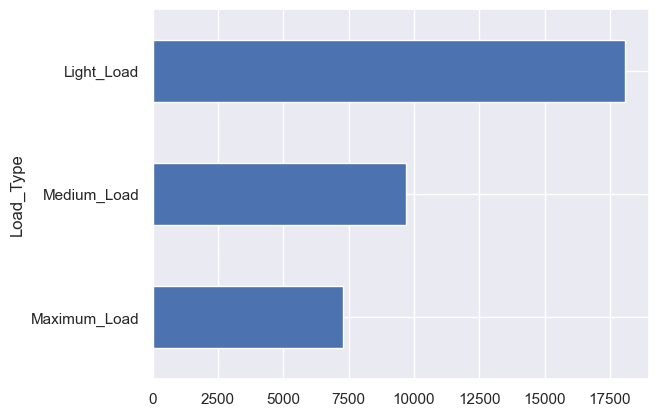

In [6]:
# Посмотрим распределение нашей целевой метрики по классам

# Предварительно установим приемлемый параметр для размера шрифта на графике
sns.set(font_scale = 1)

df['Load_Type'].value_counts().sort_values(ascending=True).plot.barh()


- Из гистограммы видно, что исходные данные имеют дисбаланс классов производственной нагрузки. Такой дисбаланс может привести к нежелательным смещениям и ошибкам в моделях, что, в свою очередь, существенно снижает их эффективность и точность.  
- Постараемся сбалансировать классы производственной нагрузки, используя метод Undersampling.

In [7]:
# Для сбалансирования классов производственной нагрузки используем метод Undersampling
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['Load_Type'], axis=1)
y = df['Load_Type']

In [8]:
# Распределение наблюдений по классам "до" сбалансирования 
y.value_counts()

Load_Type
Light_Load      18073
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

In [9]:
# Случайное удаление данных при помощи метода Undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [10]:
# Распределение наблюдений по классам "после" сбалансирования 
y_res.value_counts()

Load_Type
Light_Load      7272
Maximum_Load    7272
Medium_Load     7272
Name: count, dtype: int64

Таким образом, мы сбалансировали наши классы производственной нагрузки по наименьшему из значений (7272 наблюдений).

In [11]:
# Возвращаем в наш сбалансированный Dataset столбец с классом производственной нагрузки
X_res.insert(loc=len(X_res.columns) , column='Load_Type', value=y_res)

In [12]:
# Наш итоговый Dataset, который пойдет дальше в работу
df_balanced = X_res

In [13]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21816 entries, 7492 to 6694
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date_Time       21816 non-null  object  
 1   Usage_kWh       21816 non-null  float64 
 2   Lagging_Power   21816 non-null  float64 
 3   Leading_Power   21816 non-null  float64 
 4   CO2(tCO2)       21816 non-null  float64 
 5   Lagging_Factor  21816 non-null  float64 
 6   Leading_Factor  21816 non-null  float64 
 7   NSM             21816 non-null  int64   
 8   WeekStatus      21816 non-null  object  
 9   Day_Of_Week     21816 non-null  object  
 10  Load_Type       21816 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 1.9+ MB


<Axes: ylabel='Load_Type'>

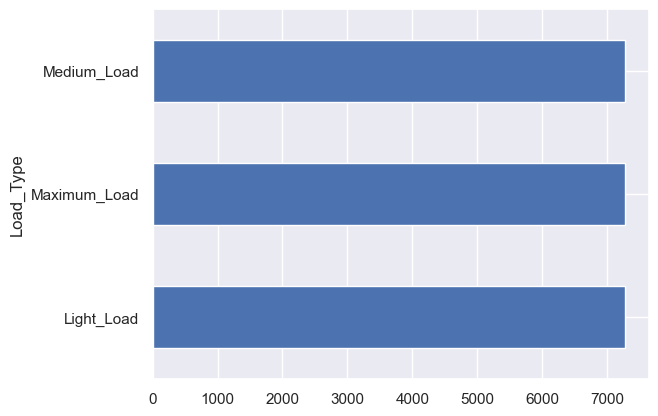

In [14]:
# Проверяем наш новый Dataset на сбалансированность классов производственной нагрузки
df_balanced['Load_Type'].value_counts().sort_values(ascending=True).plot.barh()

Итак, мы сбалансировали наши классы. В итоговом Dataset осталось 21816 наблюдений. Типы данных признаков остались без изменений. 

Можем приступить к дальнейшему анализу.

In [15]:
# Определяем базовые статистики сбалансированного Dataset
df_balanced.describe()

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM
count,21816.000,21816.000,21816.000,21816.000,21816.000,21816.000,21816.000
mean,35.314,15.816,3.985,0.015,84.600,84.857,47710.066
std,35.249,17.357,7.552,0.017,17.089,29.946,22709.889
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.600,2.160,0.000,0.000,76.418,99.610,33300.000
50%,29.215,5.870,0.000,0.010,91.040,100.000,49500.000
75%,59.360,28.440,2.810,0.030,99.410,100.000,66600.000
max,157.180,90.680,27.760,0.070,100.000,100.000,85500.000


- Данная таблица позволяет нам предварительно оценить статистические параметры распределения каждого из признаков. Например, близость среднего (mean) к медиане (50%), равномерное удаление квантилей от медианы позволяют говорить о том, что скорее всего рассматриваемый признак близок к нормальному распределению. Min и max значения позволяют нам оценить наличие выбросов. 

- Как можно заметить, из всех признаков только **NSM** и **Lagging_Factor** имеют черты нормального распределения. Во всех остальных случаях отмечается значительное смещение медианы от среднего, неравномерное удаление квантилей от медианы и т.п.  

- Более точный характер распределения мы сможем увидеть при дальнейшем анализе, в частности визуализации распределения. 

In [16]:
# Выведем также средние значения каждого из числовых признаков по каждому типу нагрузки
df_balanced.groupby('Load_Type')[['Usage_kWh','Lagging_Power','Leading_Power','CO2(tCO2)','Lagging_Factor','Leading_Factor','NSM']].mean()

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM
Load_Type,,,,,,,
Light_Load,8.495,6.973,2.977,0.002,69.666,85.208,28314.233
Maximum_Load,59.265,26.190,1.619,0.027,91.013,95.726,53036.139
Medium_Load,38.182,14.286,7.358,0.017,93.121,73.639,61779.827


Как можно заметить, по некоторым признакам наблюдается значительное различие в средних значениях (Usage_kWh), по некоторым (Lagging_Factor, Leading_Factor) - нет.  

Различие может вносить положительный вклад в формирование четких кластеров, что будет способствовать более точному моделированию и будущему предсказанию.

In [17]:
# Проверим еще раз тип данных в нашем сбалансированном Dataset
df_balanced.dtypes

Date_Time           object
Usage_kWh          float64
Lagging_Power      float64
Leading_Power      float64
CO2(tCO2)          float64
Lagging_Factor     float64
Leading_Factor     float64
NSM                  int64
WeekStatus          object
Day_Of_Week         object
Load_Type         category
dtype: object

In [18]:
# Также проверим пропуски в Dataset другим способом
df_balanced.isnull().sum()

Date_Time         0
Usage_kWh         0
Lagging_Power     0
Leading_Power     0
CO2(tCO2)         0
Lagging_Factor    0
Leading_Factor    0
NSM               0
WeekStatus        0
Day_Of_Week       0
Load_Type         0
dtype: int64

## 1.2 Одномерный анализ

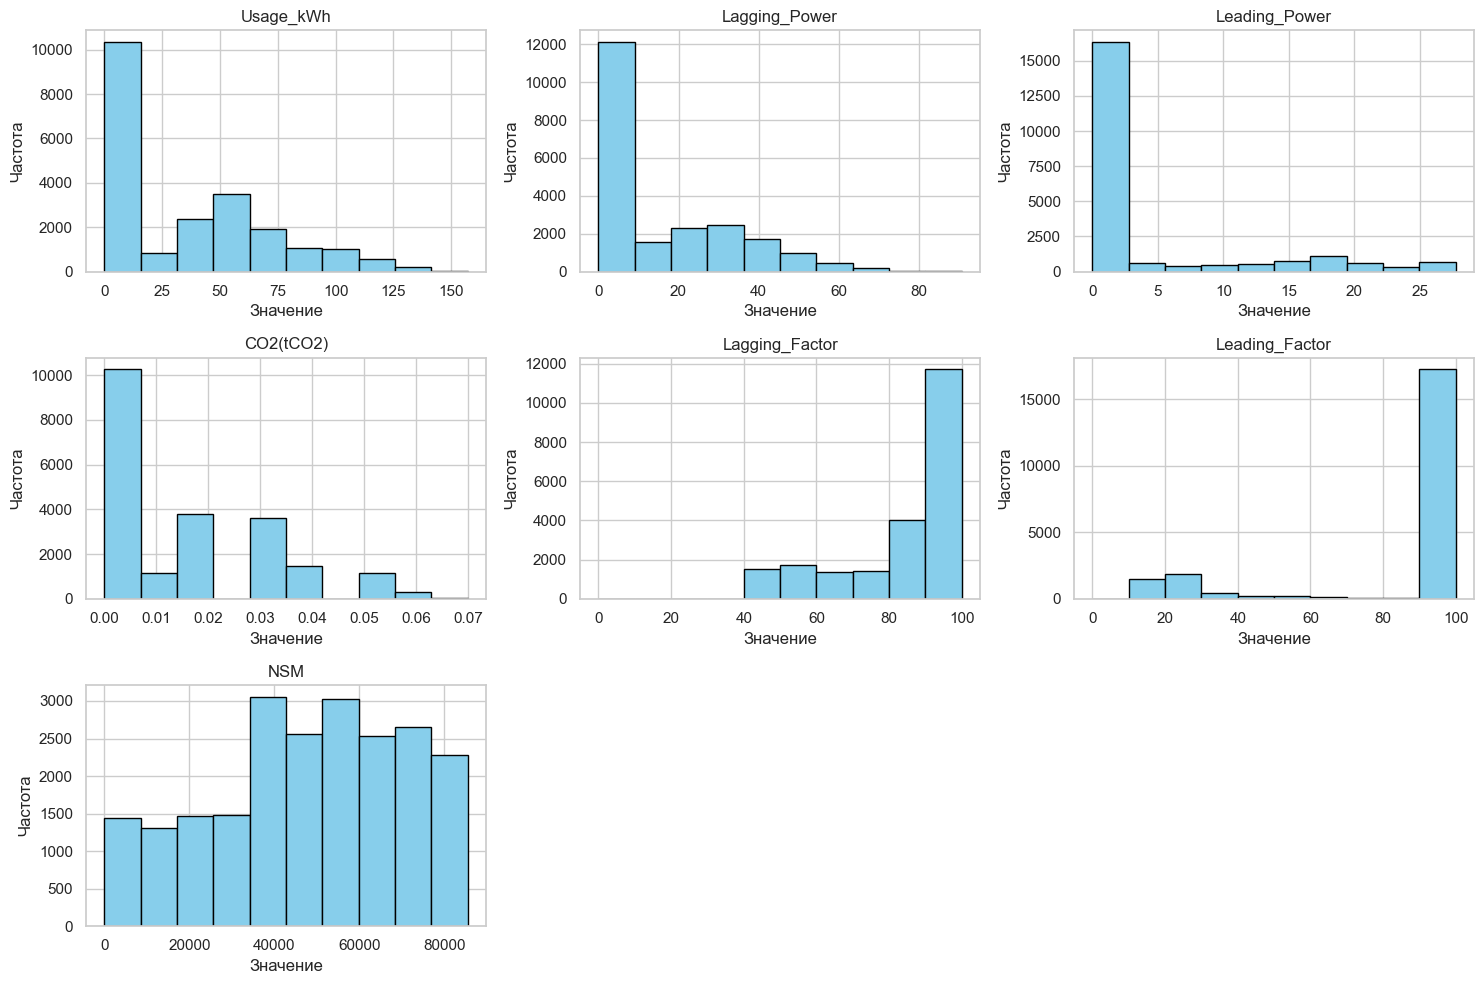

In [19]:
# Построим гистограммы распределений каждого признака

import seaborn as sns
import matplotlib.pyplot as plt

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
df_balanced.hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('Load_Type', 'Тип нагрузки'))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

Каждый из признаков имеет свой тип распределения:

- Usage, Lagging_Power, Leading_Power, CO2(tCO2) - распределение с отклонением влево;  
- Lagging_Factor, Leading_Factor - распределение с отклонением вправо;  
- NSM - относительно нормальное распределение.

Учитывая тот факт, что тип распределения в большинстве случаев отличается от нормального, целесообразно преобразовать данные с целью их приближения к нормальному распределению. 

Например, для первых четырех признаков 'Usage_kWh', 'Lagging_Power', 'Leading_Power', 'CO2(tCO2)', у которых тип распределения напоминает логарифмическое распределение со смещением влево, целесообразно провести логарифмирование, которое, в частности, поможет сузить диапазон значений. 

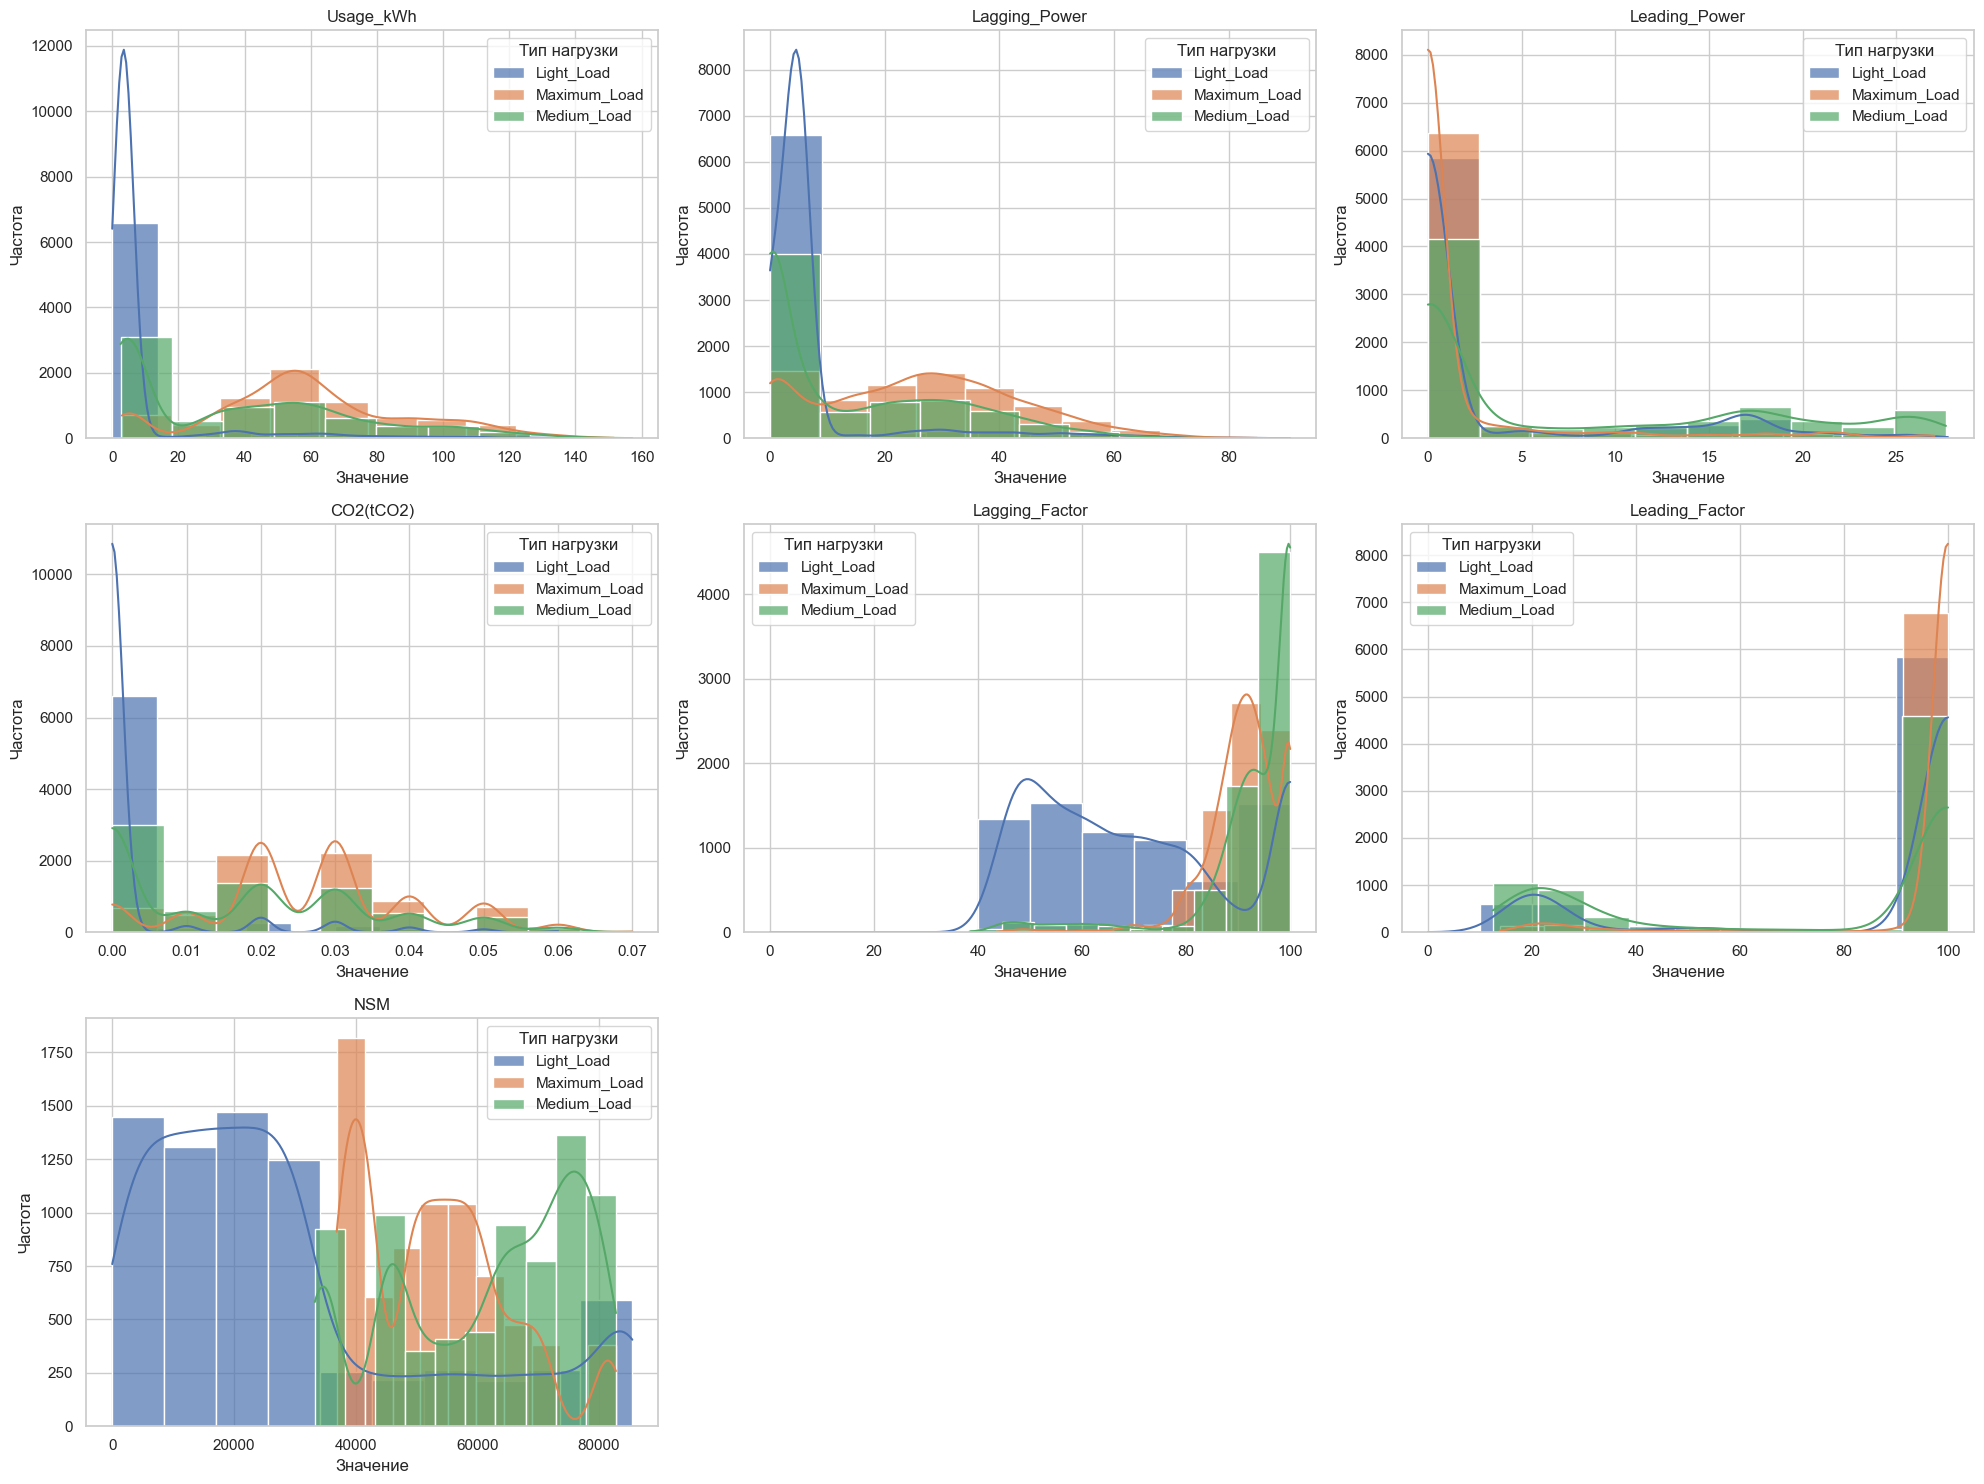

In [20]:
# Разобьем гистограммы на группы по классу производственной нагрузки
# Light_Load = 0, Medium_Load = 1, Maximum_Load = 2

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Определим уникальные классы нагрузки производственногого процесса стальных изделий
load_types = df_balanced['Load_Type'].unique()

# Определение количества строк и столбцов для сетки графиков
num_columns = 3
num_variables = len(df_balanced.select_dtypes(include=['float64', 'int']).columns)
num_rows = int(np.ceil(num_variables / num_columns))

# Создадим фигуру и массив осей для графиков
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Преобразуем массив осей в одномерный для удобства итерации

# Перебираем каждую числовую переменную и строим гистограмму с разбивкой по классам производственной нагрузки
for i, column in enumerate(df_balanced.select_dtypes(include=['float64', 'int']).columns):
    for load_type in load_types:
        # Отфильтруем Dataset по классу производственной нагрузки и построим гистограмму для текущей переменной
        sns.histplot(data=df_balanced[df_balanced['Load_Type'] == load_type], x=column, bins=10, label=load_type, kde=True, ax=axes[i], alpha=0.7)

    # Настройка внешнего вида графика
    axes[i].set_title(column)
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

    # Добавление легенды на каждый график
    axes[i].legend(title='Тип нагрузки')

# Если количество переменных не кратно 3, скроем оставшиеся пустые оси
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes[j])

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

Как можно заметить, разбивка гистограмм по классам дает некоторые дополнительные сведения.  

- По большинству признаков характер распределения сохраняется одинаковым для всех классов. 
- Для некоторых признаков такое разделение по классам выявило различие между типами распределений. Например, для признака Lagging_Factor для Light_Load нагрузки тип распределения стремится к нормальному более выраженно.
- Еще один позитивный фактор, влияющий на перспективы удачного моделирования является выраженное разделение распределений по признаку NSM (последний график). В частности, при значениях данного признака менее 35000 с, можно утверждать, что класс производственной нагрузки равен Light_Load. В целом такая четкая сегментация оказывает положительное влияние на обучение и работу моделей.

### 1.3 Двумерный анализ

C:\Users\v_v_z\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


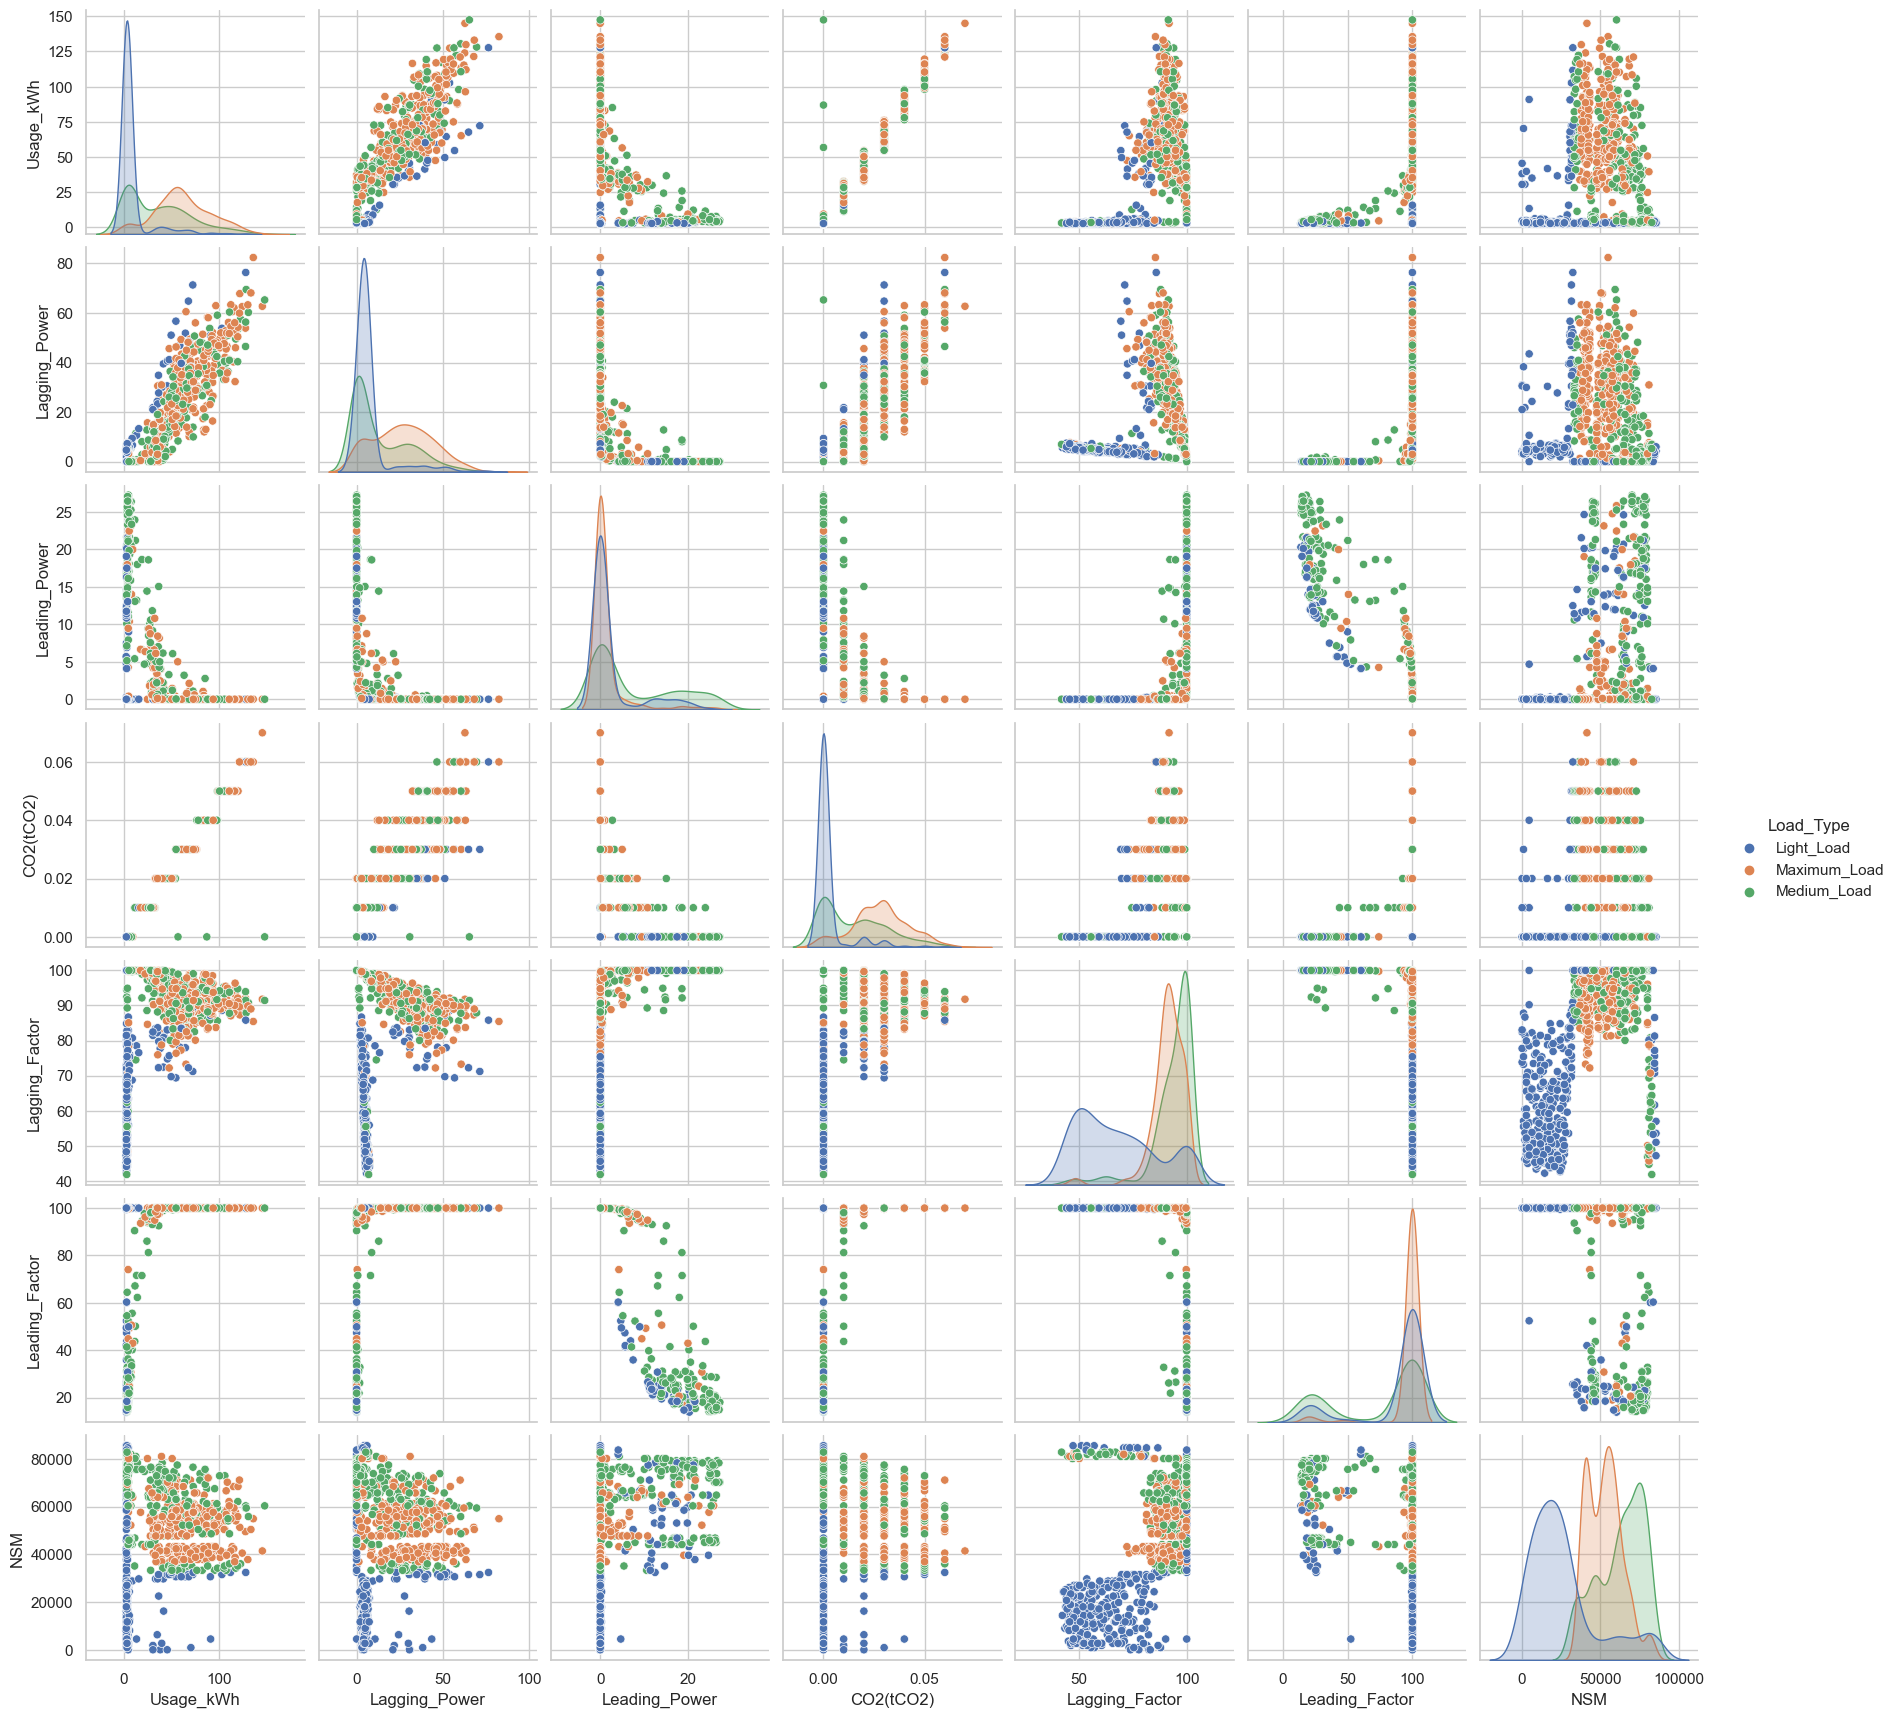

In [21]:
# Построим облако точек на основе сокращенного объема данных sample(1000)

sns.pairplot(df_balanced.sample(1000), hue="Load_Type")

plt.show()

На основе двумерного анализа можно выделить следующие ключевые аспекты:  

- Между некоторыми признаками наблюдается сильная корреляционная взаимосвязь (например, Usage - Lagging_Power);
- На некоторых графиках (например, NSM-Lagging_Factor) наблюдается сильная кластеризация признаков. Т.е. данные признаки могут способствовать качественному обучению модели. 
- Взаимосвязь между многими параметрами вовсе не имеет какой-либо корреляции. Данные признаки могут быть преобразованы в ходе дальнейшего Feature Engineering, например, путем объединения, перемножения и т.п.

### 1.4 Матрица корреляций

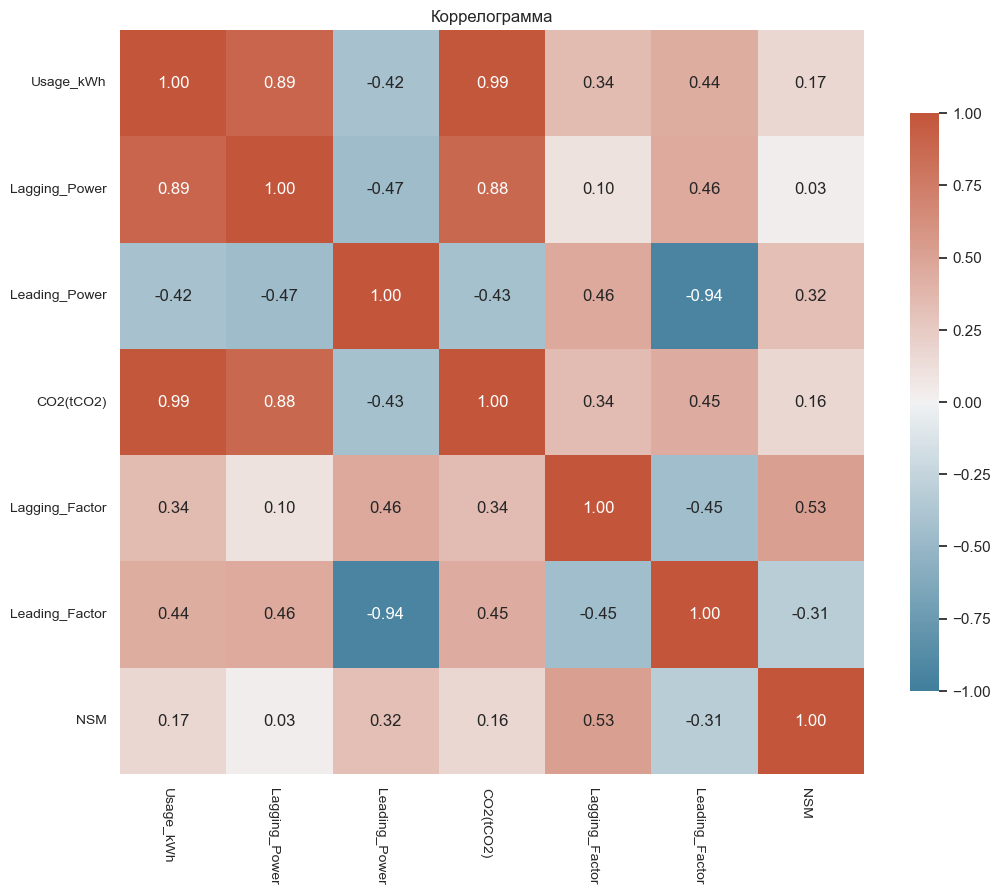

In [22]:
# Построим коррелограмму (матрицу корреляций)

import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции

corr = df_balanced.loc[:, ~df_balanced.columns.isin(['Date_Time', 'WeekStatus', 'Day_Of_Week', 'Load_Type'])].corr()

#df.loc[:, df.columns !='rebounds']

# Установка стиля Seaborn
sns.set(style="white")

# Оставляем только половину диаграммы
#mask = np.triu(np.ones_like(corr, dtype=bool))
mask = None

# Настройка цветовой палитры
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Создаем тепловую карту
plt.figure(figsize=(12, 10))  # Задаем размер фигуры
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, cbar=True, square=True, center=0,
            vmin=-1, vmax=1, cbar_kws={"shrink": .75})  # Устанавливаем центр в 0 и ограничиваем легенду значениями от -1 до 1

# Настраиваем метки
plt.title('Коррелограмма')
plt.xticks(rotation=-90, ha="right", fontsize=10)
plt.yticks(rotation=0, ha="right", fontsize=10)

plt.show()

Построенная коррелограмма также позволяет установить признаки, сильно коррелирующие между собой, что обуславливает наличие мультиколлинеарности:  
- Usage - Lagging_Power (0.89);
- Usage - CO2(tCO2) (0.99);
- CO2(tCO2) - Lagging_Power (0.88);
- Leading_Factor - Leading_Power (-0.94).  

С целью устранения мультиколлинеарности при дальнейшем преобразовании можно попробывать исключить один из подобных признаков.

### 1.5 Универсальная коррелограмма

C:\Users\v_v_z\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


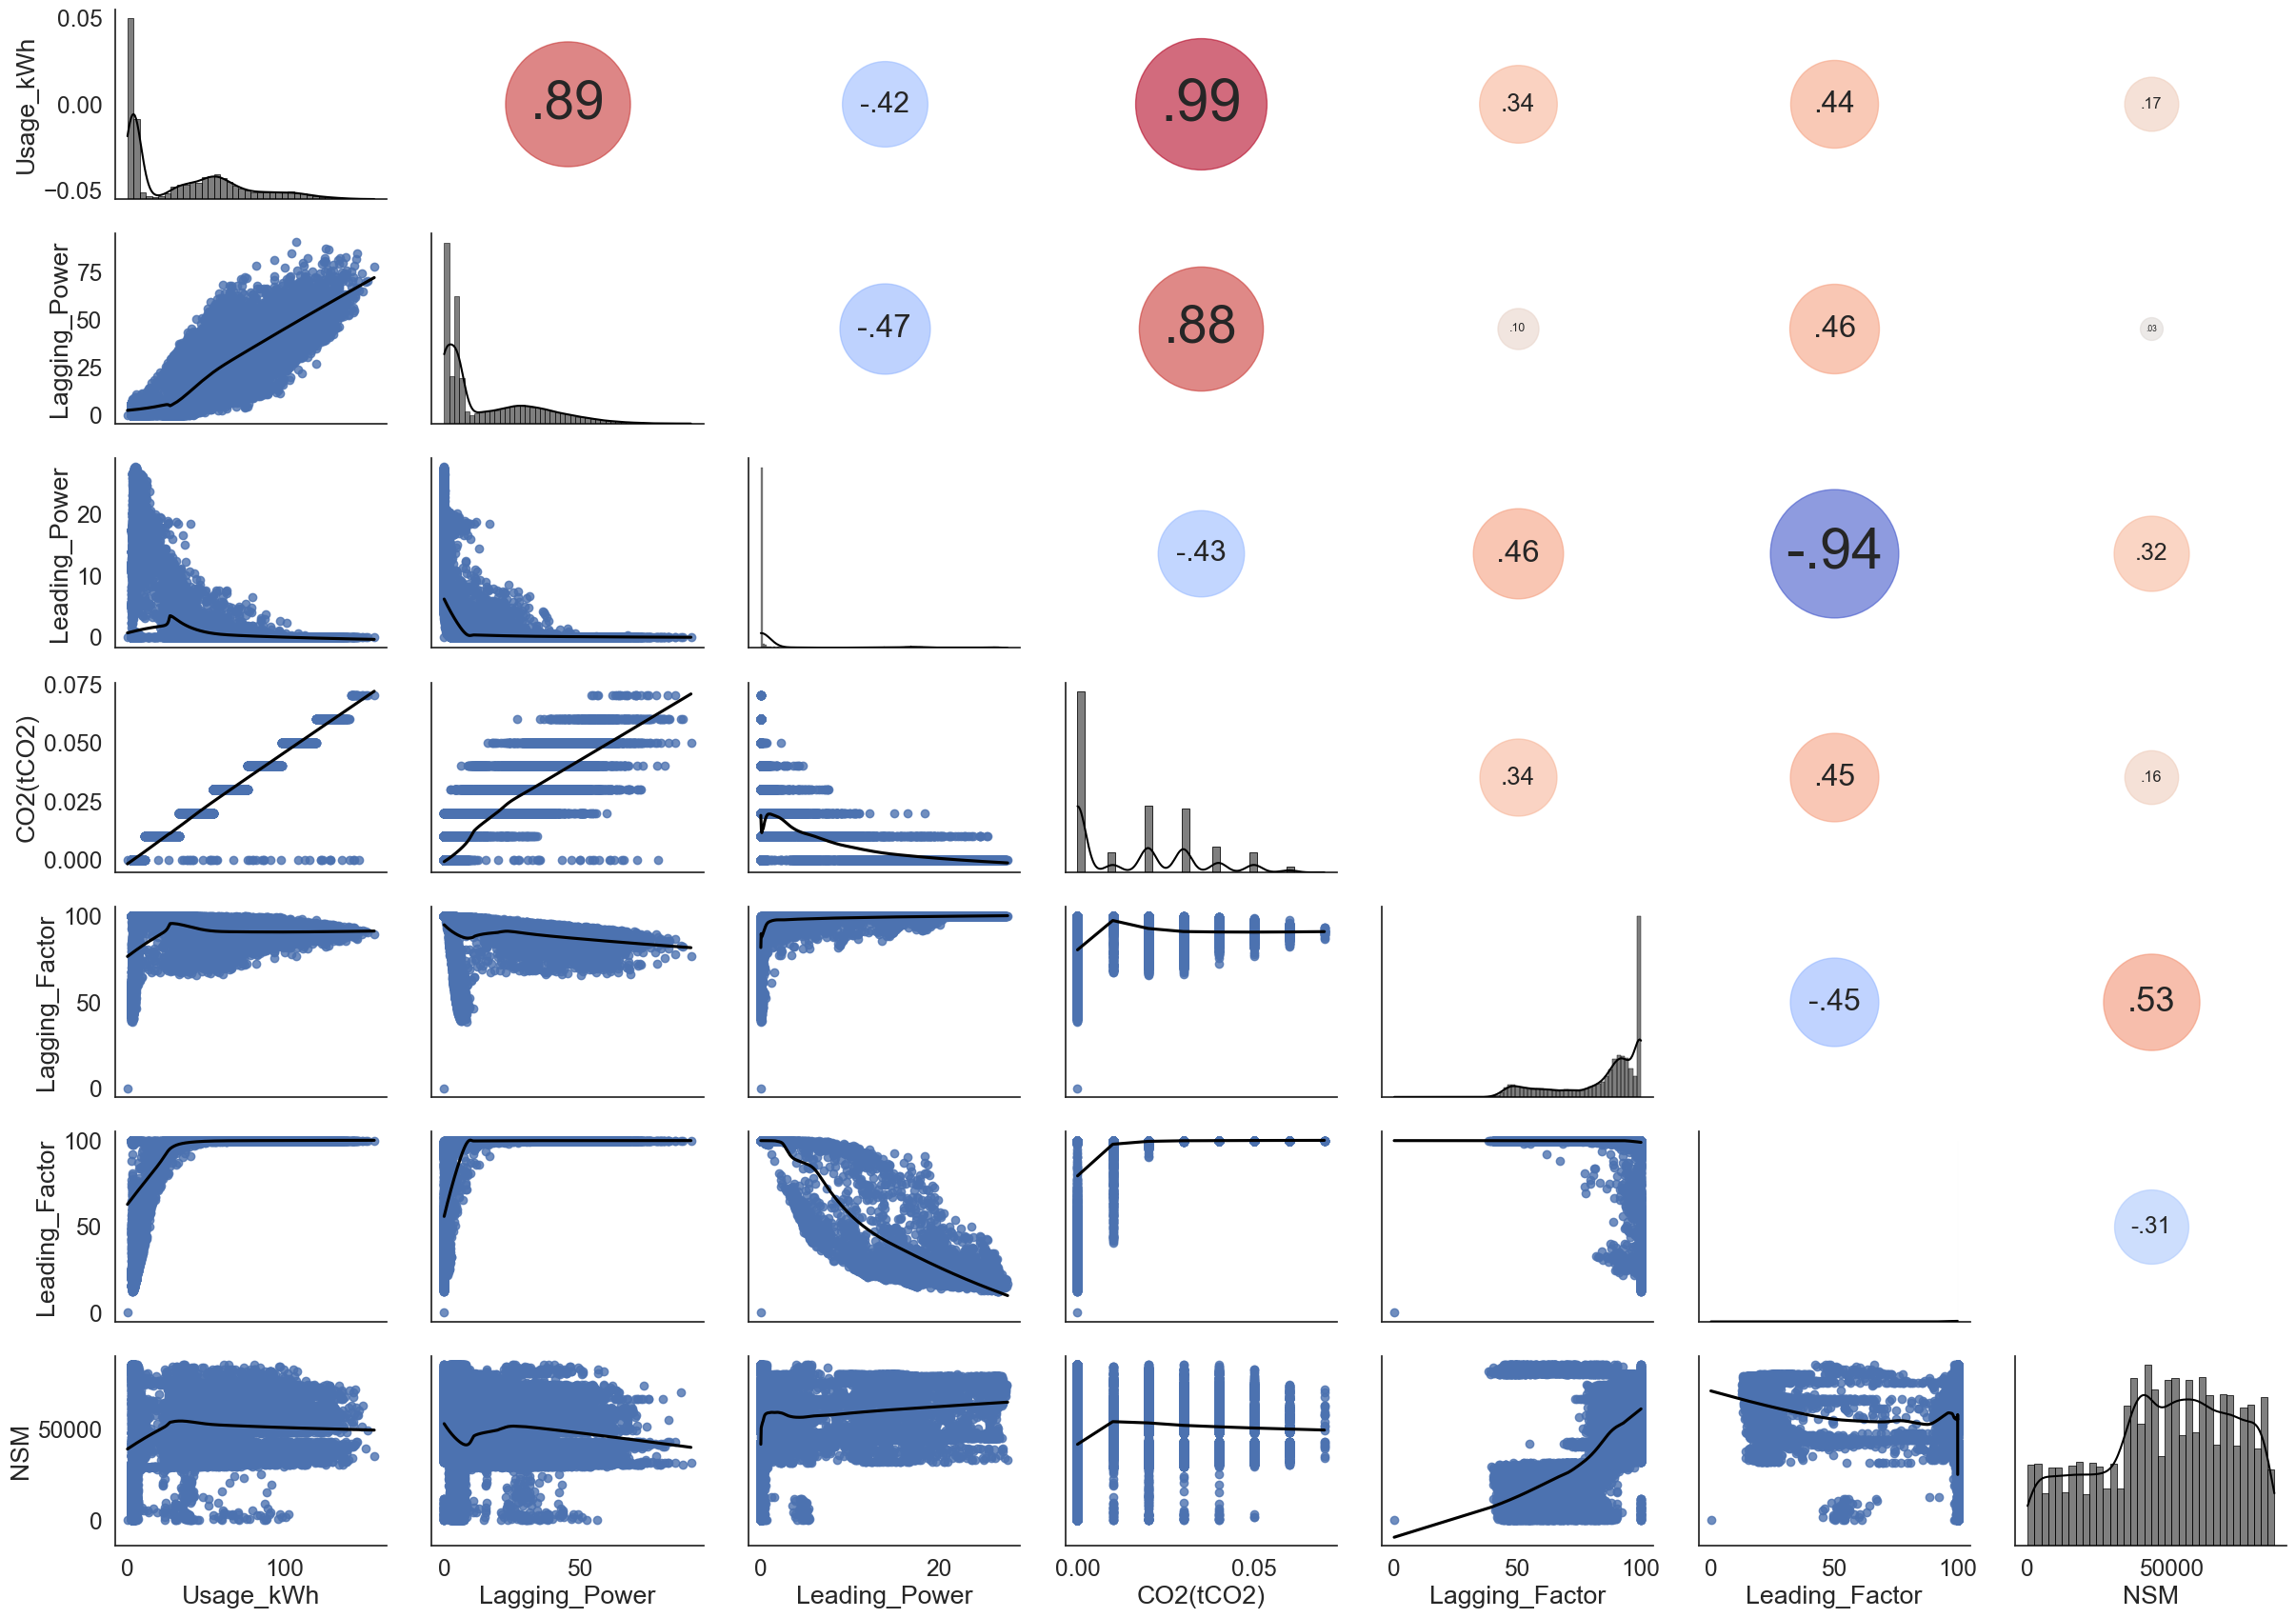

In [23]:
# универсальный метод "всё в одном"

import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_balanced, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})

g.map_diag(sns.histplot, kde=True, color='black', edgecolor='black')

g.map_upper(corrdot)

Данная диаграмма позволяет более наглядно оценить корреляционную взаимосвязь между различными признаками.   

### 1.6 Проверка мультиколлинеарности

In [24]:
# Проверим наши данные на мультиколлинеарность при помощи коэффициента инфляции дисперсии (VIF) Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_balanced[list(set(df_balanced.columns)-{'Date_Time', 'WeekStatus', 'Day_Of_Week', 'Load_Type'})]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(['VIF'], ascending=False)

,feature,VIF
4,Usage_kWh,80.021
2,CO2(tCO2),62.553
6,Lagging_Factor,47.727
0,Leading_Factor,22.885
1,Lagging_Power,10.294
3,Leading_Power,8.005
5,NSM,7.673


- Результат расчета показал, что только для трех признаков (NSM, Leading_Power, Lagging_Power) величина VIF находится в допустимых пределах (5 - 10), т.е. данные переменные не обладают чрезмерной избыточностью для модели.  
- Для всех остальных признаков мультиколлинеарность присутствует или даже определяется бесконечным значением (inf).  
- Для решения этой проблемы необходимо удалить один из признаков вызывающих подобную высокую мультиколлинеарность.

In [25]:
# Теперь применим данный метод (VIF) для каждого из классов в отдельности
from statsmodels.stats.outliers_influence import variance_inflation_factor

for Load_Type in df_balanced.Load_Type.unique():
  X = df_balanced[df_balanced.Load_Type == Load_Type][list(set(df_balanced.columns)-{'Date_Time', 'WeekStatus', 'Day_Of_Week', 'Load_Type'})]
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  print(Load_Type)
  display(vif_data.sort_values(['VIF'], ascending=False))

Light_Load


,feature,VIF
4,Usage_kWh,89.167
2,CO2(tCO2),71.514
6,Lagging_Factor,29.844
0,Leading_Factor,20.927
1,Lagging_Power,17.473
3,Leading_Power,7.856
5,NSM,3.426


Maximum_Load


,feature,VIF
6,Lagging_Factor,181.317
0,Leading_Factor,158.318
4,Usage_kWh,103.197
2,CO2(tCO2),78.520
5,NSM,20.149
1,Lagging_Power,14.938
3,Leading_Power,7.992


Medium_Load


,feature,VIF
4,Usage_kWh,66.652
6,Lagging_Factor,54.245
2,CO2(tCO2),47.991
0,Leading_Factor,27.959
5,NSM,15.843
3,Leading_Power,12.371
1,Lagging_Power,10.045


Очевидно, что для каждого класса в отдельности мультиколлинеарность, обусловленная каждым из признаков, еще выше, чем для всей выборки в целом.

### 1.7 Обучение модели на исходных параметрах

In [26]:
# Проведем обучение модели на исходных данных сбалансированного Dataset (с учетом только числовых признаков)

cols_1 = ['Usage_kWh','Lagging_Power','Leading_Power','CO2(tCO2)', 'Lagging_Factor', 'Leading_Factor', 'NSM', 'Load_Type'] 

data_1 = df_balanced[cols_1]

data_1.head()

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM,Load_Type
7492,3.640,4.460,0.000,0.000,63.230,100.000,4500,Light_Load
23710,2.520,4.430,0.000,0.000,49.440,100.000,85500,Light_Load
7391,3.280,3.920,0.000,0.000,64.170,100.000,0,Light_Load
9898,4.140,4.640,0.000,0.000,66.580,100.000,9900,Light_Load
5109,4.500,5.900,0.000,0.000,60.640,100.000,19800,Light_Load


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Разделяем датафрейм на признаки и разметку
data_1_dropped = data_1.drop(data_1.index[57:61])

X1 = data_1_dropped.copy()
del X1['Load_Type']
y1 = data_1_dropped.Load_Type.copy()

# Разделение данных на тренировочную и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state = 42)

In [28]:
# Импорт моделей
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

In [29]:
# Начинаем обучение модели, применив только метод главных компонентов РСА, для снижения влияния мультиколлинеарности

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Обучение моделей и сохранение обученных конвейеров
trained_pipelines_1 = {}

for name, model in models.items():
    pipeline_1 = make_pipeline(PCA(n_components=0.95), model)
    pipeline_1.fit(X1_train, y1_train)
    y1_pred = pipeline_1.predict(X1_test)
    accuracy = round(accuracy_score(y1_test, y1_pred), 5)
    trained_pipelines_1[name] = pipeline_1  # Сохраняем обученный конвейер
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.62549
SVM accuracy: 0.74857
Random Forest accuracy: 0.8297
KNN accuracy: 0.83108
Naive Bayes accuracy: 0.686
Decision Tree accuracy: 0.82902


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_check = data_1.iloc[57:61].copy()
del X_check['Load_Type']
real_load_type = data_1.iloc[57:61].Load_Type.copy()

display(X_check)
display(real_load_type)

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM
4460,3.310,0.000,5.470,0.000,100.000,51.770,40500
1978,5.080,0.000,25.670,0.000,100.000,19.410,53100
31305,3.060,1.800,0.500,0.000,86.190,98.690,9000
2222,42.590,31.390,0.000,0.020,80.500,100.000,13500


4460     Light_Load
1978     Light_Load
31305    Light_Load
2222     Light_Load
Name: Load_Type, dtype: category
Categories (3, object): ['Light_Load', 'Maximum_Load', 'Medium_Load']

In [31]:
predictions = {}
for name, pipeline in trained_pipelines_1.items():
    pred = pipeline_1.predict(X_check)
    predictions[name] = pred

for i, a in predictions.items():
  print(f'{i}:')
  for c in a:
    print(f'    {c}')

print(f'\nReal_Load_Type:')
for c in real_load_type:
  print(f'    {c}')

Logistic Regression:
    Maximum_Load
    Light_Load
    Light_Load
    Light_Load
SVM:
    Maximum_Load
    Light_Load
    Light_Load
    Light_Load
Random Forest:
    Maximum_Load
    Light_Load
    Light_Load
    Light_Load
KNN:
    Maximum_Load
    Light_Load
    Light_Load
    Light_Load
Naive Bayes:
    Maximum_Load
    Light_Load
    Light_Load
    Light_Load
Decision Tree:
    Maximum_Load
    Light_Load
    Light_Load
    Light_Load

Real_Load_Type:
    Light_Load
    Light_Load
    Light_Load
    Light_Load


Как можно заметить при исходных параметрах обучение моделей произошло на среднем уровне. В частности, проверочное моделирование некоторых образцов выборки показало ошибочное предсказание целевой метрики.

# 2 ВТОРОЙ ЭТАП - Feature Engineering

Рассмотрим возможные варианты преобразования метрик-признаков.

## 2.1 Нормализация и Стандартизация

In [32]:
# Все признаки имеют разные масштабы, поэтому целесообразно провести либо нормализацию, 
# либо стандартизацию данных признаков. Это позволит придать признакам относительно одинаковый вес при обучении модели
# и акцентировать внимание на природе данных, а не на их масштабе.

# Нормализация позволяет привести все значения признака в диапазон [0, 1].
# Стандартизация позволяет привести все значения признака с mean=0 и std=1.

# Выбираем в этом проекте для оптимизации метод Стандартизации (менее подвержен выбросам), 
# который учтем при создании pipeline - StandardScaler().

## 2.2 Логарифмирование

In [33]:
# Попробуем прологарифмировать признаки с логнормальным распределением

cols_2 = ['Usage_kWh','Lagging_Power','Leading_Power','CO2(tCO2)'] 

data_2 = df_balanced[cols_2].astype(float)

data_2.head()

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2)
7492,3.640,4.460,0.000,0.000
23710,2.520,4.430,0.000,0.000
7391,3.280,3.920,0.000,0.000
9898,4.140,4.640,0.000,0.000
5109,4.500,5.900,0.000,0.000


In [34]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21816 entries, 7492 to 6694
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Usage_kWh      21816 non-null  float64
 1   Lagging_Power  21816 non-null  float64
 2   Leading_Power  21816 non-null  float64
 3   CO2(tCO2)      21816 non-null  float64
dtypes: float64(4)
memory usage: 1.3 MB


In [35]:
import numpy as np

data_2 = np.log(data_2, out=np.zeros_like(data_2), where=(data_2!=0))

data_2.head()

C:\Users\v_v_z\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2)
7492,1.292,1.495,0.000,0.000
23710,0.924,1.488,0.000,0.000
7391,1.188,1.366,0.000,0.000
9898,1.421,1.535,0.000,0.000
5109,1.504,1.775,0.000,0.000


In [36]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21816 entries, 7492 to 6694
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Usage_kWh      21816 non-null  float64
 1   Lagging_Power  21816 non-null  float64
 2   Leading_Power  21816 non-null  float64
 3   CO2(tCO2)      21816 non-null  float64
dtypes: float64(4)
memory usage: 1.3 MB


In [37]:
# Теперь добавим прологарифмированные данные в исходную таблицу

# Создадим промежуточную таблицу
data_2_o = pd.DataFrame(df_balanced).copy()

In [38]:
# Для начала удалим из этой промежуточной (исходной сбалансированной таблицы) старые данные
data_2_o.drop(['Usage_kWh','Lagging_Power','Leading_Power','CO2(tCO2)'], axis=1, inplace= True)

In [39]:
data_2_o.head()

,Date_Time,Lagging_Factor,Leading_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
7492,20/03/2018 01:15,63.230,100.000,4500,Weekday,Tuesday,Light_Load
23710,04/09/2018 23:45,49.440,100.000,85500,Weekday,Tuesday,Light_Load
7391,18/03/2018 00:00,64.170,100.000,0,Weekend,Sunday,Light_Load
9898,14/04/2018 02:45,66.580,100.000,9900,Weekend,Saturday,Light_Load
5109,23/02/2018 05:30,60.640,100.000,19800,Weekday,Friday,Light_Load


In [40]:
# Объединяем две таблицы (исходную и с прологарифмированными значениями)
df_balanced_log = pd.concat([data_2,data_2_o], sort=False, axis=1)

In [41]:
# Меняем порядок столбцов как в первоначальном варианте
df_balanced_log[['Date_Time','Usage_kWh','Lagging_Power','Leading_Power','CO2(tCO2)', 'Lagging_Factor', 'Leading_Factor', 'NSM', 'WeekStatus', 'Day_Of_Week', 'Load_Type']].head()

,Date_Time,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
7492,20/03/2018 01:15,1.292,1.495,0.000,0.000,63.230,100.000,4500,Weekday,Tuesday,Light_Load
23710,04/09/2018 23:45,0.924,1.488,0.000,0.000,49.440,100.000,85500,Weekday,Tuesday,Light_Load
7391,18/03/2018 00:00,1.188,1.366,0.000,0.000,64.170,100.000,0,Weekend,Sunday,Light_Load
9898,14/04/2018 02:45,1.421,1.535,0.000,0.000,66.580,100.000,9900,Weekend,Saturday,Light_Load
5109,23/02/2018 05:30,1.504,1.775,0.000,0.000,60.640,100.000,19800,Weekday,Friday,Light_Load


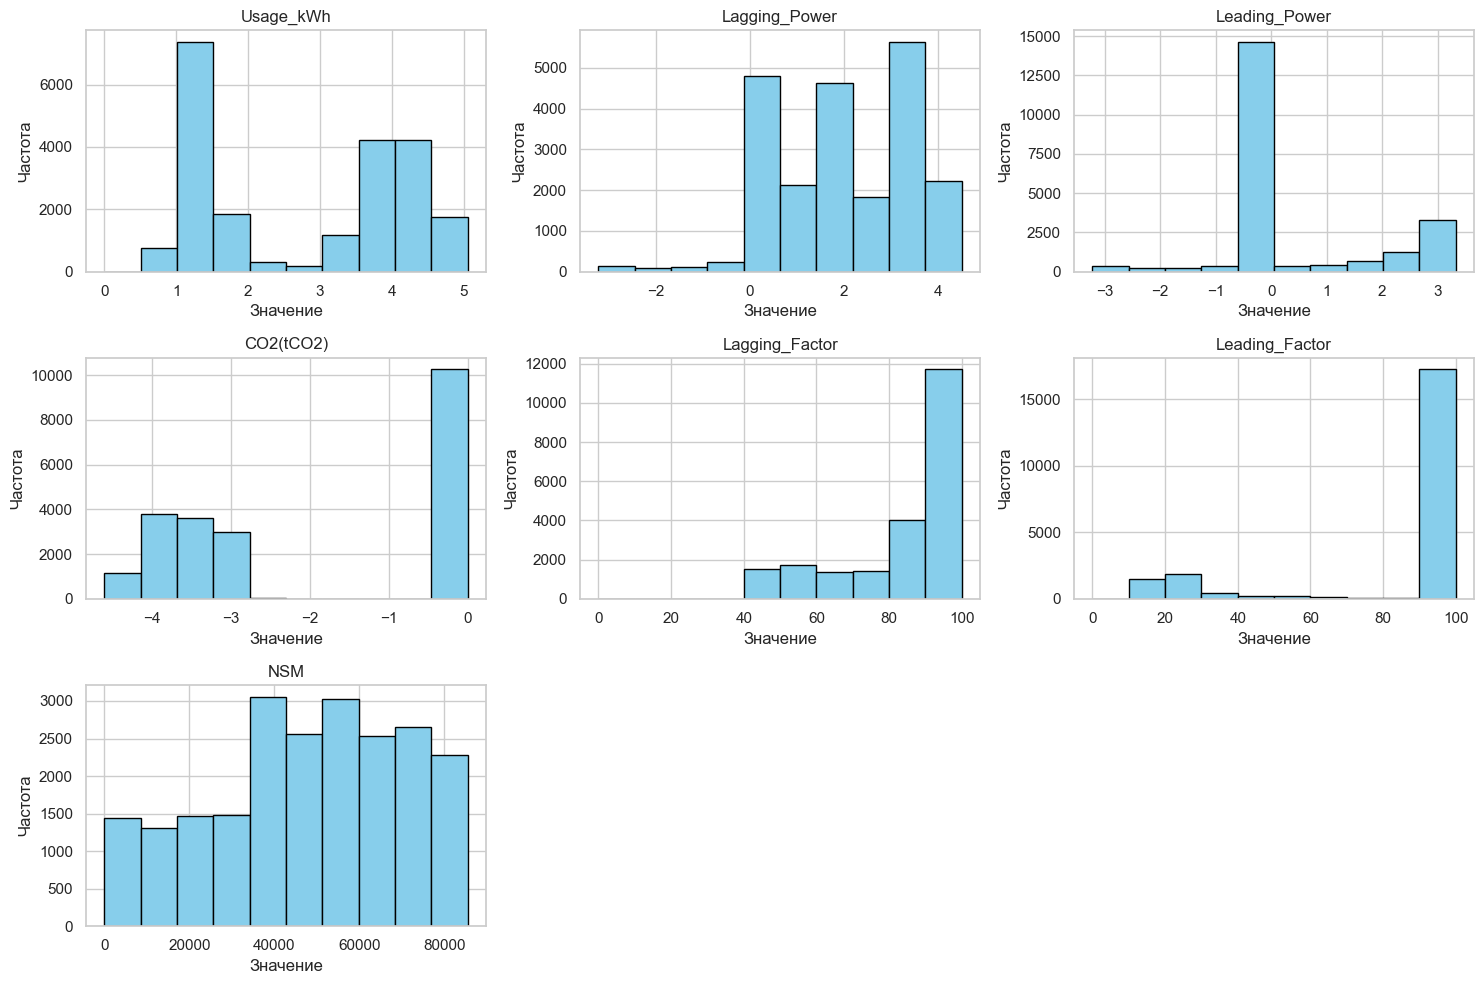

In [42]:
# Построим гистограммы распределений каждого признака (с прологарифмированными значениями)

import seaborn as sns
import matplotlib.pyplot as plt

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
df_balanced_log.hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('Load_Type', 'Тип нагрузки'))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

Как можно заметить, логарифмирование позволило лишь незначительно приблизить тип распределения к нормальному.

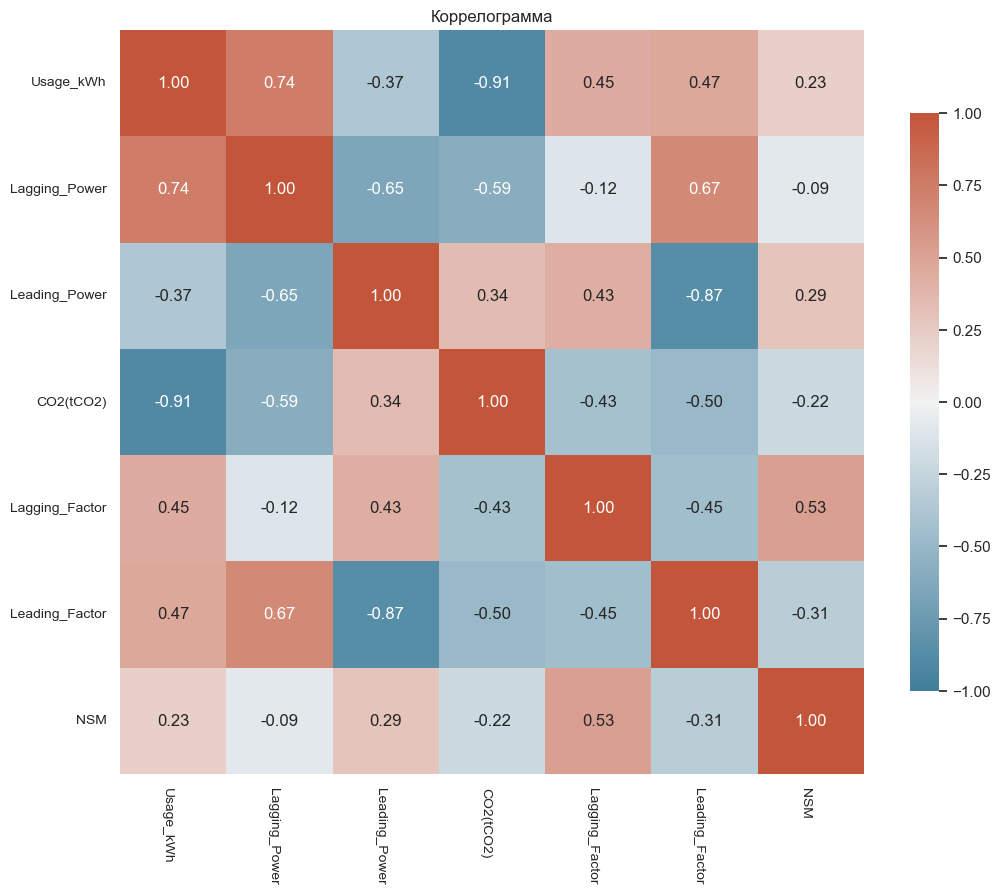

In [43]:
# Построим коррелограмму (матрицу корреляций) (с прологарифмированными значениями)

import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции

corr = df_balanced_log.loc[:, ~df_balanced_log.columns.isin(['Date_Time', 'WeekStatus', 'Day_Of_Week', 'Load_Type'])].corr()

#df.loc[:, df.columns !='rebounds']

# Установка стиля Seaborn
sns.set(style="white")

# Оставляем только половину диаграммы
#mask = np.triu(np.ones_like(corr, dtype=bool))
mask = None

# Настройка цветовой палитры
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Создаем тепловую карту
plt.figure(figsize=(12, 10))  # Задаем размер фигуры
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, cbar=True, square=True, center=0,
            vmin=-1, vmax=1, cbar_kws={"shrink": .75})  # Устанавливаем центр в 0 и ограничиваем легенду значениями от -1 до 1

# Настраиваем метки
plt.title('Коррелограмма')
plt.xticks(rotation=-90, ha="right", fontsize=10)
plt.yticks(rotation=0, ha="right", fontsize=10)

plt.show()

In [44]:
df_balanced_log.head()

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Date_Time,Lagging_Factor,Leading_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
7492,1.292,1.495,0.000,0.000,20/03/2018 01:15,63.230,100.000,4500,Weekday,Tuesday,Light_Load
23710,0.924,1.488,0.000,0.000,04/09/2018 23:45,49.440,100.000,85500,Weekday,Tuesday,Light_Load
7391,1.188,1.366,0.000,0.000,18/03/2018 00:00,64.170,100.000,0,Weekend,Sunday,Light_Load
9898,1.421,1.535,0.000,0.000,14/04/2018 02:45,66.580,100.000,9900,Weekend,Saturday,Light_Load
5109,1.504,1.775,0.000,0.000,23/02/2018 05:30,60.640,100.000,19800,Weekday,Friday,Light_Load


## 2.3 Генерация полиномиальных признаков

In [45]:
# В качестве возможного полиномиального признака можно рассмотреть 
# перемножение признаков общего потребления энергии (Usage) и выбросов (СО2).
from sklearn.preprocessing import PolynomialFeatures

# Предположим, у нас есть DataFrame со следующими числовыми признаками

data_poly_o = df_balanced_log.values[:, [0, 3]]

In [46]:
data_poly_o

array([[1.2919836816486494, 0.0],
       [0.9242589015233319, 0.0],
       [1.1878434223960523, 0.0],
       ...,
       [1.2809338454620642, 0.0],
       [3.914220588971633, -3.912023005428146],
       [3.393501175027685, -4.605170185988091]], dtype=object)

In [47]:
# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
data_poly = poly.fit_transform(data_poly_o)
data_poly = pd.DataFrame(data_poly, columns=poly.get_feature_names_out(['Usage_kWh', 'CO2(tCO2)']))

In [48]:
data_poly.head()

,Usage_kWh,CO2(tCO2),Usage_kWh^2,Usage_kWh CO2(tCO2),CO2(tCO2)^2
0,1.292,0.000,1.669,0.000,0.000
1,0.924,0.000,0.854,0.000,0.000
2,1.188,0.000,1.411,0.000,0.000
3,1.421,0.000,2.018,0.000,0.000
4,1.504,0.000,2.262,0.000,0.000


In [49]:
data_poly.drop(['Usage_kWh','CO2(tCO2)'], axis=1, inplace= True)

In [50]:
# Теперь добавим прологарифмированные данные в исходную таблицу

# Создадим промежуточную таблицу
data_3_o = pd.DataFrame(df_balanced_log).copy()

In [51]:
# Для начала удалим из этой промежуточной (исходной сбалансированной таблицы) старые данные
data_3_o.drop(['Usage_kWh','CO2(tCO2)'], axis=1, inplace= True)

In [52]:
data_3_o.head()

,Lagging_Power,Leading_Power,Date_Time,Lagging_Factor,Leading_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
7492,1.495,0.000,20/03/2018 01:15,63.230,100.000,4500,Weekday,Tuesday,Light_Load
23710,1.488,0.000,04/09/2018 23:45,49.440,100.000,85500,Weekday,Tuesday,Light_Load
7391,1.366,0.000,18/03/2018 00:00,64.170,100.000,0,Weekend,Sunday,Light_Load
9898,1.535,0.000,14/04/2018 02:45,66.580,100.000,9900,Weekend,Saturday,Light_Load
5109,1.775,0.000,23/02/2018 05:30,60.640,100.000,19800,Weekday,Friday,Light_Load


In [53]:
# Объединяем две таблицы (исходную и с полиномиальными значениями)
df_balanced_log_poly = pd.concat([data_poly,data_3_o], sort=False, axis=1)

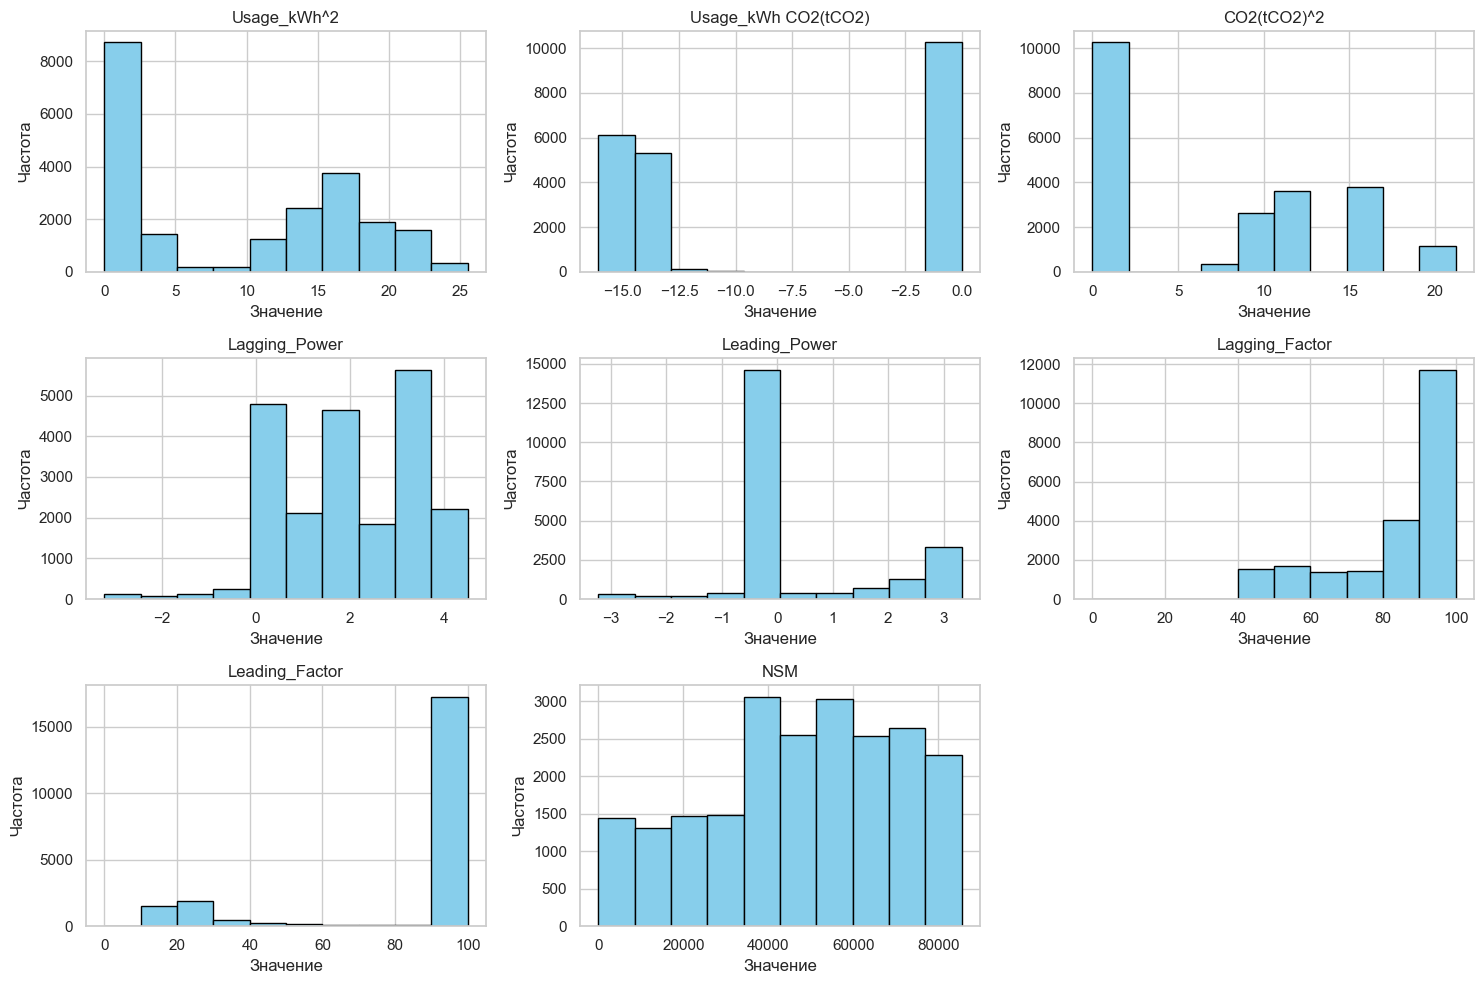

In [54]:
# Построим гистограммы распределений каждого признака (с полиномиальными значениями)

import seaborn as sns
import matplotlib.pyplot as plt

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
df_balanced_log_poly.hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('Load_Type', 'Тип нагрузки'))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

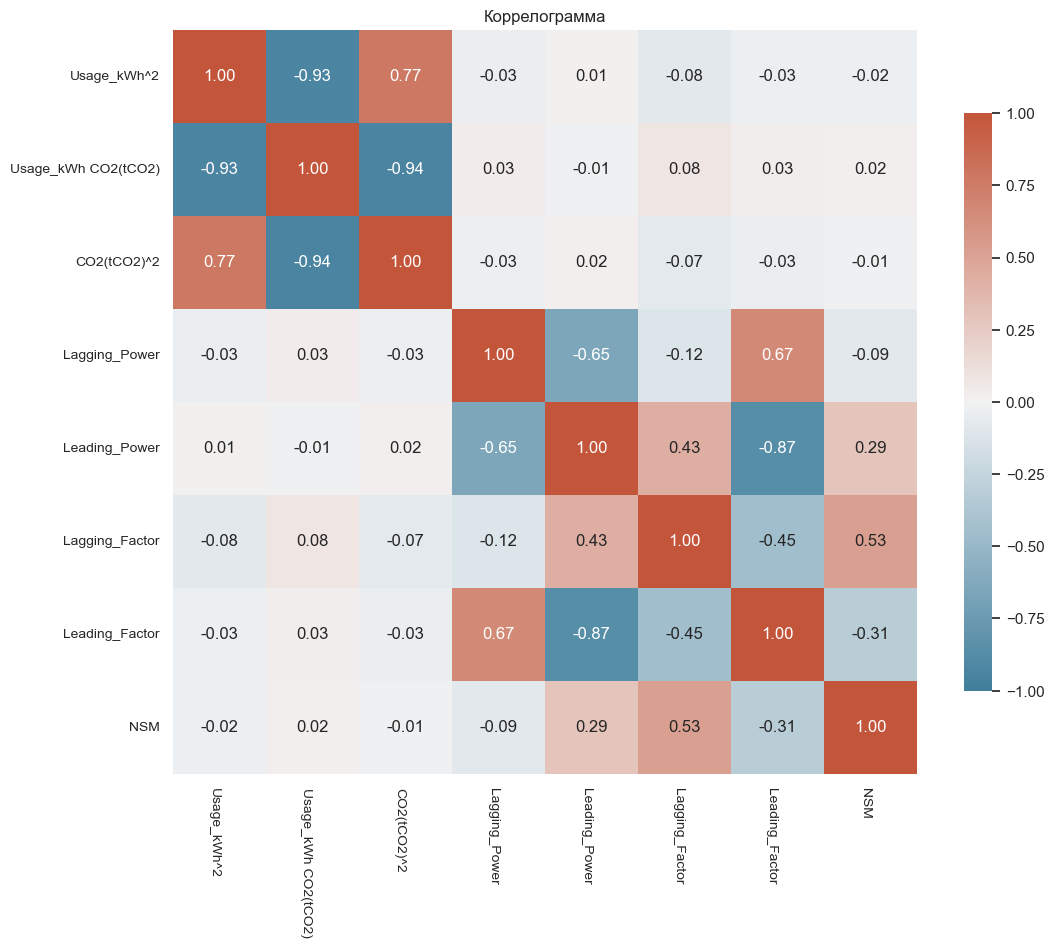

In [55]:
# Построим коррелограмму (матрицу корреляций) (с полиномиальными значениями)

import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции

corr = df_balanced_log_poly.loc[:, ~df_balanced_log_poly.columns.isin(['Date_Time', 'WeekStatus', 'Day_Of_Week', 'Load_Type'])].corr()

#df.loc[:, df.columns !='rebounds']

# Установка стиля Seaborn
sns.set(style="white")

# Оставляем только половину диаграммы
#mask = np.triu(np.ones_like(corr, dtype=bool))
mask = None

# Настройка цветовой палитры
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Создаем тепловую карту
plt.figure(figsize=(12, 10))  # Задаем размер фигуры
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, cbar=True, square=True, center=0,
            vmin=-1, vmax=1, cbar_kws={"shrink": .75})  # Устанавливаем центр в 0 и ограничиваем легенду значениями от -1 до 1

# Настраиваем метки
plt.title('Коррелограмма')
plt.xticks(rotation=-90, ha="right", fontsize=10)
plt.yticks(rotation=0, ha="right", fontsize=10)

plt.show()

Необходимо рассмотреть другие варианты объединения признаков.

## 2.4 Преобразование категориальных данных

### 2.4.1 Оценка категориальных признаков

In [56]:
# Попробуем оценить влияние категориальных величин на целевую метрику

# Выведем категориальные данные в отдельную таблицу
data_cat = pd.DataFrame(df_balanced_log).copy()
cont_features = ['Usage_kWh','Lagging_Power','Leading_Power','CO2(tCO2)','Lagging_Factor','Leading_Factor','NSM']
data_cat.drop(cont_features, axis=1, inplace=True)
data_cat.head()

,Date_Time,WeekStatus,Day_Of_Week,Load_Type
7492,20/03/2018 01:15,Weekday,Tuesday,Light_Load
23710,04/09/2018 23:45,Weekday,Tuesday,Light_Load
7391,18/03/2018 00:00,Weekend,Sunday,Light_Load
9898,14/04/2018 02:45,Weekend,Saturday,Light_Load
5109,23/02/2018 05:30,Weekday,Friday,Light_Load


In [57]:
# Переведем целевую метрику в числовые значения
# Light_Load = 0, Medium_Load = 1, Maximum_Load = 2

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data_cat['Load_Type'].unique()

['Light_Load', 'Maximum_Load', 'Medium_Load']
Categories (3, object): ['Light_Load', 'Maximum_Load', 'Medium_Load']

In [58]:
loads = ['Light_Load', 'Medium_Load', 'Maximum_Load']
encoder_cat = OrdinalEncoder(categories = [loads])
encoder_cat.fit_transform(data_cat[['Load_Type']])

# Добавим числовые (порядковые) значения класса в таблицу

data_cat['Load_Type_№'] = encoder_cat.fit_transform(data_cat[['Load_Type']])
data_cat.head()

,Date_Time,WeekStatus,Day_Of_Week,Load_Type,Load_Type_№
7492,20/03/2018 01:15,Weekday,Tuesday,Light_Load,0.000
23710,04/09/2018 23:45,Weekday,Tuesday,Light_Load,0.000
7391,18/03/2018 00:00,Weekend,Sunday,Light_Load,0.000
9898,14/04/2018 02:45,Weekend,Saturday,Light_Load,0.000
5109,23/02/2018 05:30,Weekday,Friday,Light_Load,0.000


Load_Type_№  WeekStatus
0.000        Weekday       4521
             Weekend       2751
1.000        Weekday       5947
             Weekend       1325
2.000        Weekday       5952
             Weekend       1320
Name: count, dtype: int64

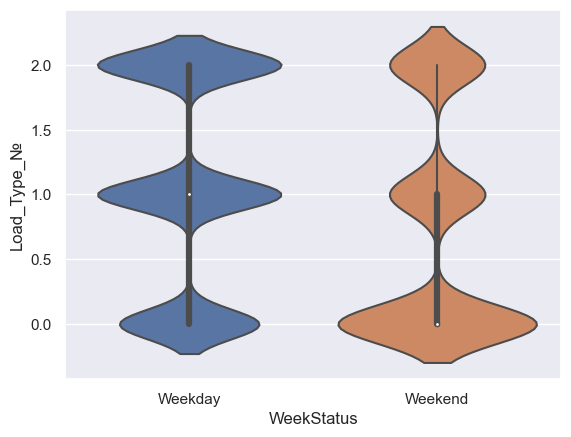

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Влияние категориальной величины 'WeekStatus' на целевую метрику

sns.set(font_scale = 1)

data_cat = data_cat.explode('Load_Type_№')
data_cat['Load_Type_№'] = data_cat['Load_Type_№'].astype('float')
sns.violinplot(data=data_cat, x='WeekStatus', y='Load_Type_№')

data_cat.groupby('Load_Type_№')['WeekStatus'].value_counts()

Как можно заметить, низкий класс (Light_Load = 0) производственной нагрузки имеет больший вес в выходной день, в свою очередь, средний ('Medium_Load' = 1) и максимальный ('Maximum_Load' = 2) классы - в будние дни.

Load_Type_№  Day_Of_Week
0.000        Sunday         1625
             Saturday       1126
             Monday          957
             Wednesday       912
             Tuesday         907
             Thursday        885
             Friday          860
1.000        Thursday       1237
             Monday         1190
             Friday         1183
             Wednesday      1172
             Tuesday        1165
             Saturday        919
             Sunday          406
2.000        Monday         1200
             Friday         1200
             Thursday       1200
             Wednesday      1176
             Tuesday        1176
             Saturday        912
             Sunday          408
Name: count, dtype: int64

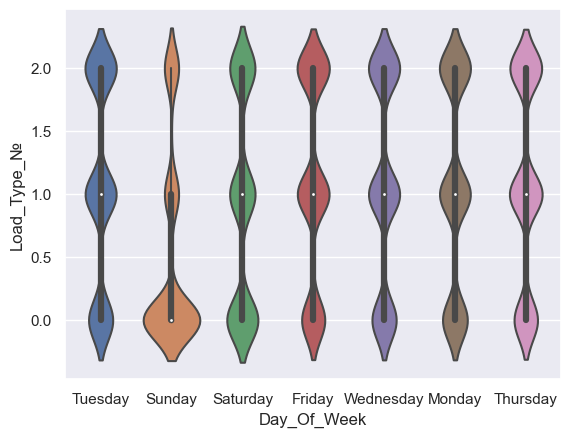

In [60]:
# Влияние категориальной величины 'Day_Of_Week' на целевую метрику

sns.violinplot(data=data_cat, x='Day_Of_Week', y='Load_Type_№')

data_cat.groupby('Load_Type_№')['Day_Of_Week'].value_counts()

Наблюдается относительно равномерное распределение по классам нагрузки в различные дни недели. Только в воскресенье наблюдается чрезмерное преобладание класса с низкой производственной нагрузкой.

### 2.4.2 Преобразование категориальных признаков - OneHotEncoder

In [61]:
# Попробуем преобразовать категориальные признаки
from sklearn.preprocessing import OneHotEncoder

# Допустим, у нас есть DataFrame с категориальной переменной
data_week = pd.DataFrame({
    'WeekStatus': ['Weekday', 'Weekend'],
})

# One-Hot Encoding
encoder_week = OneHotEncoder(sparse_output=False)  # Используем новый параметр `sparse_output`
data_encoded = encoder_week.fit_transform(data_week[['WeekStatus']])
data_encoded = pd.DataFrame(data_encoded, columns=encoder_week.get_feature_names_out(['WeekStatus']))

In [62]:
data_encoded

,WeekStatus_Weekday,WeekStatus_Weekend
0,1.000,0.000
1,0.000,1.000


### 2.4.3 Label Encoding (Ordinal Encoding)

In [63]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Просмотр последних строк Dataset, включаещего только категориальные величины
data_cat.tail(5)

,Date_Time,WeekStatus,Day_Of_Week,Load_Type,Load_Type_№
26448,03/10/2018 12:15,Weekday,Wednesday,Medium_Load,1.000
2871,30/01/2018 22:00,Weekday,Tuesday,Medium_Load,1.000
28113,20/10/2018 20:30,Weekend,Saturday,Medium_Load,1.000
32293,03/12/2018 09:30,Weekday,Monday,Medium_Load,1.000
6694,11/03/2018 17:45,Weekend,Sunday,Medium_Load,1.000


In [64]:
data_cat['Day_Of_Week'].unique()

array(['Tuesday', 'Sunday', 'Saturday', 'Friday', 'Wednesday', 'Monday',
       'Thursday'], dtype=object)

In [65]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

encoder_days = OrdinalEncoder(categories = [days])

encoder_days.fit_transform(data_cat[['Day_Of_Week']])

array([[1.],
       [1.],
       [6.],
       ...,
       [5.],
       [0.],
       [6.]])

In [66]:
data_cat['Day_Of_Week'] = encoder_days.fit_transform(data_cat[['Day_Of_Week']])
data_cat.tail(5)

,Date_Time,WeekStatus,Day_Of_Week,Load_Type,Load_Type_№
26448,03/10/2018 12:15,Weekday,2.000,Medium_Load,1.000
2871,30/01/2018 22:00,Weekday,1.000,Medium_Load,1.000
28113,20/10/2018 20:30,Weekend,5.000,Medium_Load,1.000
32293,03/12/2018 09:30,Weekday,0.000,Medium_Load,1.000
6694,11/03/2018 17:45,Weekend,6.000,Medium_Load,1.000


In [67]:
data_cat['Day_Of_Week'].value_counts()

Day_Of_Week
0.000    3347
3.000    3322
2.000    3260
1.000    3248
4.000    3243
5.000    2957
6.000    2439
Name: count, dtype: int64

Ранее установленное относительно равномерное распределение классов производственной нагрузки по дням недели, свидетельствует о низкой коррелирующей составляющей между этими показателями. Поэтому это параметр был рассмотрен скорее в обучающих целях.

### 2.4.4 Bining

Продолжим анализ категориальных данных.   

Попробуем разбить данные по дате на четыре категории (Утро, День, Вечер и Ночь) и посмотреть как время суток влияет на класс производственной нагрузки.

In [68]:
# Преобразуем данные признака 'Date_Time' в категорию времени

# Importing the pandas package
import pandas as pd
 
# Making a data frame from a CSV file
data_time = pd.DataFrame(df_balanced_log).copy()
data_time['Date_Time'].head()

7492     20/03/2018 01:15
23710    04/09/2018 23:45
7391     18/03/2018 00:00
9898     14/04/2018 02:45
5109     23/02/2018 05:30
Name: Date_Time, dtype: object

In [69]:
data_time['Date_Time'] = pd.to_datetime(data_time['Date_Time'], format='%d/%m/%Y %H:%M', errors='coerce')

In [70]:
data_time['Date_Time'].head(2)

7492    2018-03-20 01:15:00
23710   2018-09-04 23:45:00
Name: Date_Time, dtype: datetime64[ns]

In [71]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21816 entries, 7492 to 6694
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Usage_kWh       21816 non-null  float64       
 1   Lagging_Power   21816 non-null  float64       
 2   Leading_Power   21816 non-null  float64       
 3   CO2(tCO2)       21816 non-null  float64       
 4   Date_Time       21816 non-null  datetime64[ns]
 5   Lagging_Factor  21816 non-null  float64       
 6   Leading_Factor  21816 non-null  float64       
 7   NSM             21816 non-null  int64         
 8   WeekStatus      21816 non-null  object        
 9   Day_Of_Week     21816 non-null  object        
 10  Load_Type       21816 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 2.4+ MB


In [72]:
bins=[-0.01, 360, 720, 1080, 1440]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data_time['Time_category'] = pd.cut(((data_time.Date_Time.dt.hour)*60 + data_time.Date_Time.dt.minute), bins, labels = labels)

In [73]:
data_time['Time_category'].isna().sum()

0

In [74]:
data_time[['Date_Time', 'Time_category', 'Load_Type']].tail()

,Date_Time,Time_category,Load_Type
26448,2018-10-03 12:15:00,Afternoon,Medium_Load
2871,2018-01-30 22:00:00,Evening,Medium_Load
28113,2018-10-20 20:30:00,Evening,Medium_Load
32293,2018-12-03 09:30:00,Morning,Medium_Load
6694,2018-03-11 17:45:00,Afternoon,Medium_Load


In [75]:
# Переведем класс нагрузки в числовое (порядковое) значение для последующего анализа влияния времени суток
# на класс производственной нагрузки
loads = ['Light_Load', 'Medium_Load', 'Maximum_Load']
encoder_cat = OrdinalEncoder(categories = [loads])
encoder_cat.fit_transform(data_time[['Load_Type']])
data_time['Load_Type_№'] = encoder_cat.fit_transform(data_time[['Load_Type']])
data_time[['Time_category', 'Load_Type_№', 'Load_Type']].head()

,Time_category,Load_Type_№,Load_Type
7492,Night,0.000,Light_Load
23710,Evening,0.000,Light_Load
7391,Night,0.000,Light_Load
9898,Night,0.000,Light_Load
5109,Night,0.000,Light_Load


In [76]:
# Влияние категориальной величины 'Time_category' на целевую метрику

data_time_cat = data_time.explode('Load_Type_№')
data_time_cat['Load_Type_№'] = data_time_cat['Load_Type_№'].astype('float')
data_time_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21816 entries, 7492 to 6694
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Usage_kWh       21816 non-null  float64       
 1   Lagging_Power   21816 non-null  float64       
 2   Leading_Power   21816 non-null  float64       
 3   CO2(tCO2)       21816 non-null  float64       
 4   Date_Time       21816 non-null  datetime64[ns]
 5   Lagging_Factor  21816 non-null  float64       
 6   Leading_Factor  21816 non-null  float64       
 7   NSM             21816 non-null  int64         
 8   WeekStatus      21816 non-null  object        
 9   Day_Of_Week     21816 non-null  object        
 10  Load_Type       21816 non-null  category      
 11  Time_category   21816 non-null  category      
 12  Load_Type_№     21816 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 2.0+ MB


Load_Type_№  Time_category
0.000        Night            3630
             Morning          2126
             Evening           921
             Afternoon         595
1.000        Evening          3679
             Afternoon        2672
             Morning           921
             Night               0
2.000        Afternoon        3708
             Morning          2424
             Evening          1140
             Night               0
Name: count, dtype: int64

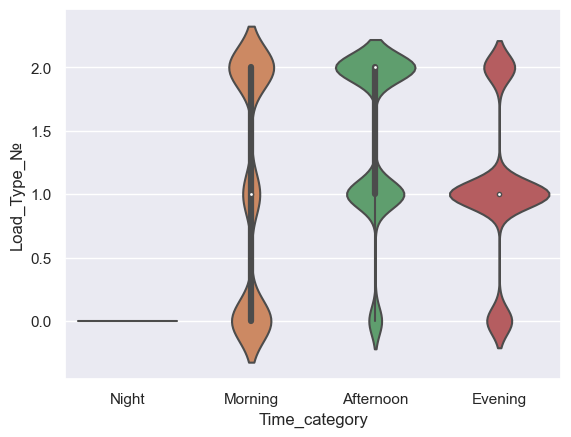

In [77]:
sns.violinplot(data=data_time_cat, x='Time_category', y='Load_Type_№')

data_time_cat.groupby('Load_Type_№')['Time_category'].value_counts()

Как можно заметить время суток, вероятно, оказывает существенное влияние на класс производственной нагрузки.

# 3 ТРЕТИЙ ЭТАП - Обучение моделей
## 3.1 Исходные данные + стандартизация

In [78]:
# Используем pipeline созданный в исходной модели с добавлением метода стандартизации StandardScaler()
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Обучение моделей и сохранение обученных конвейеров
trained_pipelines_2 = {}

for name, model in models.items():
    pipeline_2 = make_pipeline(StandardScaler(), PCA(n_components=0.95), model)
    pipeline_2.fit(X1_train, y1_train)
    y1_pred = pipeline_2.predict(X1_test)
    accuracy = round(accuracy_score(y1_test, y1_pred), 5)
    trained_pipelines_2[name] = pipeline_2  # Сохраняем обученный конвейер
    print(f"{name} accuracy: {accuracy}")
    

Logistic Regression accuracy: 0.69448
SVM accuracy: 0.76026
Random Forest accuracy: 0.83864
KNN accuracy: 0.8297
Naive Bayes accuracy: 0.67637
Decision Tree accuracy: 0.80105


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_check = data_1.iloc[57:61].copy()
del X_check['Load_Type']
real_load_type = data_1.iloc[57:61].Load_Type.copy()

display(X_check)
display(real_load_type)

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM
4460,3.310,0.000,5.470,0.000,100.000,51.770,40500
1978,5.080,0.000,25.670,0.000,100.000,19.410,53100
31305,3.060,1.800,0.500,0.000,86.190,98.690,9000
2222,42.590,31.390,0.000,0.020,80.500,100.000,13500


4460     Light_Load
1978     Light_Load
31305    Light_Load
2222     Light_Load
Name: Load_Type, dtype: category
Categories (3, object): ['Light_Load', 'Maximum_Load', 'Medium_Load']

In [80]:
predictions = {}
for name, pipeline in trained_pipelines_2.items():
    pred = pipeline_2.predict(X_check)
    predictions[name] = pred

for i, a in predictions.items():
  print(f'{i}:')
  for c in a:
    print(f'    {c}')

print(f'\nReal_Load_Type:')
for c in real_load_type:
  print(f'    {c}')

Logistic Regression:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
SVM:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Random Forest:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
KNN:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Naive Bayes:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Decision Tree:
    Light_Load
    Light_Load
    Light_Load
    Light_Load

Real_Load_Type:
    Light_Load
    Light_Load
    Light_Load
    Light_Load


Как можно заметить, в данном случае модели обучились лучше и правильно предсказали предполагаемый класс нагрузки.

## 3.2 Исходные данные + стандартизация + логарифмирование

In [81]:
# Продолжаем улучшать параметры обучения модели
# Проведем обучение модели на исходных данных сбалансированного Dataset (с учетом только числовых признаков),
# добавив к ранее добавленному методу РСА и стандартизации - прологарифмированные величины

cols_1 = ['Usage_kWh','Lagging_Power','Leading_Power','CO2(tCO2)', 'Lagging_Factor', 'Leading_Factor', 'NSM', 'Load_Type'] 

data_3 = df_balanced_log[cols_1]

data_3.head()

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM,Load_Type
7492,1.292,1.495,0.000,0.000,63.230,100.000,4500,Light_Load
23710,0.924,1.488,0.000,0.000,49.440,100.000,85500,Light_Load
7391,1.188,1.366,0.000,0.000,64.170,100.000,0,Light_Load
9898,1.421,1.535,0.000,0.000,66.580,100.000,9900,Light_Load
5109,1.504,1.775,0.000,0.000,60.640,100.000,19800,Light_Load


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Разделяем фатафрейм на признаки и разметку
data_3_dropped = data_3.drop(data_3.index[57:61])

X3 = data_3_dropped.copy()
del X3['Load_Type']
y3 = data_3_dropped.Load_Type.copy()

# Разделение данных на тренировочную и тестовую выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state = 42)

In [83]:
# Начинаем обучение модели, применив только метод главных компонентов РСА

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Обучение моделей и сохранение обученных конвейеров
trained_pipelines_3 = {}

for name, model in models.items():
    pipeline_3 = make_pipeline(StandardScaler(), PCA(n_components=0.95), model)
    pipeline_3.fit(X3_train, y3_train)
    y3_pred = pipeline_3.predict(X3_test)
    accuracy = round(accuracy_score(y3_test, y3_pred), 5)
    trained_pipelines_3[name] = pipeline_3  # Сохраняем обученный конвейер
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.66583
SVM accuracy: 0.7818
Random Forest accuracy: 0.85583
KNN accuracy: 0.84437
Naive Bayes accuracy: 0.67912
Decision Tree accuracy: 0.82443


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_check = data_3.iloc[57:61].copy()
del X_check['Load_Type']
real_load_type = data_3.iloc[57:61].Load_Type.copy()

display(X_check)
display(real_load_type)

,Usage_kWh,Lagging_Power,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM
4460,1.197,0.000,1.699,0.000,100.000,51.770,40500
1978,1.625,0.000,3.245,0.000,100.000,19.410,53100
31305,1.118,0.588,-0.693,0.000,86.190,98.690,9000
2222,3.752,3.446,0.000,-3.912,80.500,100.000,13500


4460     Light_Load
1978     Light_Load
31305    Light_Load
2222     Light_Load
Name: Load_Type, dtype: category
Categories (3, object): ['Light_Load', 'Maximum_Load', 'Medium_Load']

In [85]:
predictions = {}
for name, pipeline in trained_pipelines_3.items():
    pred = pipeline_3.predict(X_check)
    predictions[name] = pred

for i, a in predictions.items():
  print(f'{i}:')
  for c in a:
    print(f'    {c}')

print(f'\nReal_Load_Type:')
for c in real_load_type:
  print(f'    {c}')

Logistic Regression:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
SVM:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Random Forest:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
KNN:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Naive Bayes:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Decision Tree:
    Light_Load
    Light_Load
    Light_Load
    Light_Load

Real_Load_Type:
    Light_Load
    Light_Load
    Light_Load
    Light_Load


Как можно заметить, в данном варианте большинство моделей обучилось еще лучше и также во всех случаях правильно предсказали класс производственной нагрузки.

## 3.3 Исходные данные + стандартизация + логарифмирование - признак Lagging_Power

In [86]:
# Попробуем удалить признак Lagging_Power

In [87]:
# Проведем обучение модели на исходных данных сбалансированного Dataset (с учетом только числовых признаков)

cols_2 = ['Usage_kWh','Leading_Power','CO2(tCO2)', 'Lagging_Factor', 'Leading_Factor', 'NSM', 'Load_Type'] 

data_4 = df_balanced_log[cols_2]

data_4.head()

,Usage_kWh,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM,Load_Type
7492,1.292,0.000,0.000,63.230,100.000,4500,Light_Load
23710,0.924,0.000,0.000,49.440,100.000,85500,Light_Load
7391,1.188,0.000,0.000,64.170,100.000,0,Light_Load
9898,1.421,0.000,0.000,66.580,100.000,9900,Light_Load
5109,1.504,0.000,0.000,60.640,100.000,19800,Light_Load


In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Разделяем фатафрейм на признаки и разметку
data_4_dropped = data_4.drop(data_4.index[57:61])

X4 = data_4_dropped.copy()
del X4['Load_Type']
y4 = data_4_dropped.Load_Type.copy()

# Разделение данных на тренировочную и тестовую выборки
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state = 42)

In [89]:
# Начинаем обучение модели, применив только метод главных компонентов РСА

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Обучение моделей и сохранение обученных конвейеров
trained_pipelines_4 = {}

for name, model in models.items():
    pipeline_4 = make_pipeline(StandardScaler(), PCA(n_components=0.95), model)
    pipeline_4.fit(X4_train, y4_train)
    y4_pred = pipeline_4.predict(X4_test)
    accuracy = round(accuracy_score(y4_test, y4_pred), 5)
    trained_pipelines_4[name] = pipeline_4  # Сохраняем обученный конвейер
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.67362
SVM accuracy: 0.79189
Random Forest accuracy: 0.85927
KNN accuracy: 0.84942
Naive Bayes accuracy: 0.68187
Decision Tree accuracy: 0.81412


In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_check = data_4.iloc[57:61].copy()
del X_check['Load_Type']
real_load_type = data_4.iloc[57:61].Load_Type.copy()

display(X_check)
display(real_load_type)

,Usage_kWh,Leading_Power,CO2(tCO2),Lagging_Factor,Leading_Factor,NSM
4460,1.197,1.699,0.000,100.000,51.770,40500
1978,1.625,3.245,0.000,100.000,19.410,53100
31305,1.118,-0.693,0.000,86.190,98.690,9000
2222,3.752,0.000,-3.912,80.500,100.000,13500


4460     Light_Load
1978     Light_Load
31305    Light_Load
2222     Light_Load
Name: Load_Type, dtype: category
Categories (3, object): ['Light_Load', 'Maximum_Load', 'Medium_Load']

In [91]:
predictions = {}
for name, pipeline in trained_pipelines_1.items():
    pred = pipeline_4.predict(X_check)
    predictions[name] = pred

for i, a in predictions.items():
  print(f'{i}:')
  for c in a:
    print(f'    {c}')

print(f'\nReal_Load_Type:')
for c in real_load_type:
  print(f'    {c}')

Logistic Regression:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
SVM:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Random Forest:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
KNN:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Naive Bayes:
    Light_Load
    Light_Load
    Light_Load
    Light_Load
Decision Tree:
    Light_Load
    Light_Load
    Light_Load
    Light_Load

Real_Load_Type:
    Light_Load
    Light_Load
    Light_Load
    Light_Load


Данный подход удаления признака, вызывающего сильную мультиколлинеарность также позволил немного увеличить точность моделей.

# Сравнительный график

Ниже представлен график изменения показателя accuracy при последовательном Feature Enginering. Как можно заметить для большинства моделей данные меры позволяли, хоть и незначительно, но увеличивать точность предсказания.

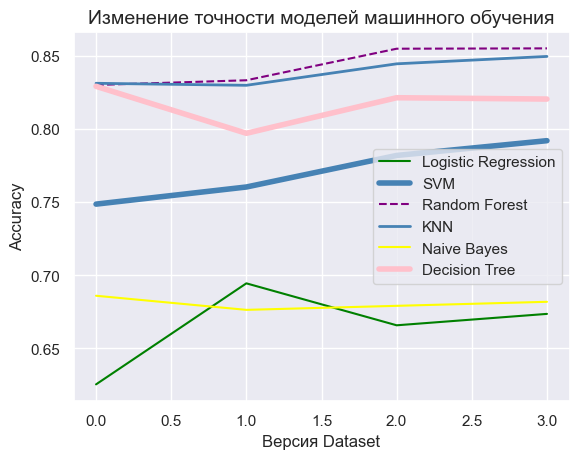

In [92]:
pd.options.display.float_format = '{:.5f}'.format # преобразует все значения из степенного вида в целые
                                                  # Например 1.256e+2 станет 125.600
df_result = pd.DataFrame({'Версия Dataset': [0, 1, 2, 3],
                   'Logistic Regression': [0.62549, 0.69448, 0.66583, 0.67362],
                   'SVM': [0.74857, 0.76026, 0.7818, 0.79189],
                   'Random Forest': [0.82993, 0.83314, 0.85469, 0.85492],
                   'KNN': [0.83108, 0.8297, 0.84437, 0.84942],
                   'Naive Bayes': [0.686, 0.67637, 0.67912, 0.68187],
                   'Decision Tree': [0.82902, 0.79693, 0.82122, 0.82031]
                 })

plt.plot(df_result['Logistic Regression'], label='Logistic Regression', color='green')
plt.plot(df_result['SVM'], label='SVM', color='steelblue', linewidth= 4 )
plt.plot(df_result['Random Forest'], label='Random Forest', color='purple', linestyle='dashed')
plt.plot(df_result['KNN'], label='KNN', color='steelblue', linewidth= 2 )
plt.plot(df_result['Naive Bayes'], label='Naive Bayes', color='yellow')
plt.plot(df_result['Decision Tree'], label='Decision Tree', color='pink', linewidth= 4 )

#label='Sales', color='purple', linestyle='dashed'

plt.legend()

plt.ylabel('Accuracy', fontsize= 12)
plt.xlabel('Версия Dataset', fontsize= 12)
plt.title('Изменение точности моделей машинного обучения', fontsize= 14 )

#display plot
plt.show() 

# Версия Dataset (по оси х)
# 0.0 - Исходная модель
# 1.0 - Исходные данные + стандартизация
# 2.0 - Исходные данные + стандартизация + логарифмирование
# 3.0 - Исходные данные + стандартизация + логарифмирование + исключение признака Lagging_Power

Что еще планируется сделать: 
1) все-таки включить в расчет категориальные преобразованные величины;
2) преобразовать величины путем умножения, сложения, генерация полиномиальных признаков и т.п.
3) провести анализ путем постепенного отбрасывания признаков или добавления с учетом их корреляционной взаимосвязи с целевой метриков. 